<a href="https://colab.research.google.com/github/vtien/Predicting-Hospital-Stay-Project/blob/master/Hospital_Stay_Project_Blog_Edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Length of Stay for Hospital Inpatients**

Vishal Tien - 5/6/2020

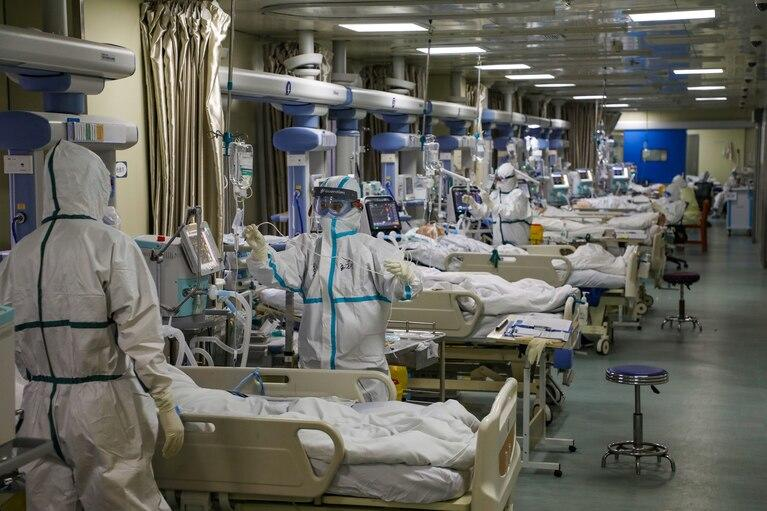

Length of stay is a [critical indicator](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5898738/) of the efficiency of hospital management. Hospitals have limited resources, requiring efficient use of beds and clinician time. For these reasons and more, it is in the best interest of patients, hospitals, and public health to limit any hospital stay to no longer than necessary and to have an idea of how long a given inpatient may need to stay. In this way, the ability to predict how long a patient will stay as soon as they enter the hospital and are diagnosed can have many positive effects for a hospital and its efficiency. Beyond benefits to the hospital, predicting patient's length of stay also greatly benefits the patients and patient's families themselves, as they will have an idea of how long they are expected to stay on day 1 of their visit.

A model that could predict patient length of stay could allow hospitals to better analyze factors such as the procedures, demographics of patients, and others that influence length of stay the most. Such analysis could pave the path for reductions in the length of inpatient stay, which could in turn have the effect of decreased risk of infection and medication side effects, improvement in the quality of treatment, and increased hospital profit with more efficient bed management. 

To begin this project, I will first read the data in from a csv file uploaded to google drive. The dataset used in this project can be found on Kaggle [here](https://www.kaggle.com/jonasalmeida/2015-deidentified-ny-inpatient-discharge-sparcs). It contains various descriptions for inpatients at hospitals in the NY area in 2015. Patient data has been de-identified according to HIPAA regulations

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [2]:
file_list = drive.ListFile({'q': "'1mqDYl9UIVnc25touE_5sRldbAuhCsBmX' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv, id: 1aLCFiritC6En9hb0p8Nmmo4U982Vqt79


In [3]:
import pandas as pd

df_downloaded = drive.CreateFile({'id': '1aLCFiritC6En9hb0p8Nmmo4U982Vqt79'})
df_downloaded.GetContentFile('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')

df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
display(df)

Health Service Area Hospital County  ...  Total Charges  Total Costs
0                Western NY     Cattaraugus  ...       $5620.00     $4561.28
1                Western NY     Cattaraugus  ...       $7404.18     $6933.94
2                Western NY     Cattaraugus  ...       $7931.28     $7154.85
3                Western NY     Cattaraugus  ...      $11304.44     $4584.11
4                Western NY      Chautauqua  ...       $8330.50     $4361.74
...                     ...             ...  ...            ...          ...
2346755         Long Island         Suffolk  ...      $43494.00     $6637.09
2346756         Long Island         Suffolk  ...      $16662.00     $3236.18
2346757         Long Island         Suffolk  ...       $7142.00     $1862.39
2346758         Long Island         Suffolk  ...      $13070.00     $2744.13
2346759         Long Island         Suffolk  ...      $14637.00     $2128.89

[2346760 rows x 37 columns]

Next, let's get a sense of the types of data in our dataframe and the distribution of values within each feature

In [0]:
df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [0]:
df.describe()

Operating Certificate Number   Facility Id  ...  Total Charges   Total Costs
count                  2.343849e+06  2.343849e+06  ...   2.346760e+06  2.346760e+06
mean                   5.007196e+06  1.043335e+03  ...   4.320562e+04  1.598484e+04
std                    2.259460e+06  7.134138e+02  ...   8.043895e+04  3.238360e+04
min                    1.010000e+05  1.000000e+00  ...   1.000000e-02  0.000000e+00
25%                    2.951001e+06  5.410000e+02  ...   1.202705e+04  4.724148e+03
50%                    5.907001e+06  1.099000e+03  ...   2.348088e+04  8.791390e+03
75%                    7.002012e+06  1.450000e+03  ...   4.660665e+04  1.683467e+04
max                    7.004010e+06  9.431000e+03  ...   7.248391e+06  5.236615e+06

[8 rows x 15 columns]

# **Data Wrangling**



Next, let's check for the presence of null values in our table and deal with them appropriately. Here, I find that some columns have a few null values, which can be dropped easily, while other columns have large number of null values. For these columns, I simply drop them as they do not provide much information. 

In [0]:
df.isna().sum()

Health Service Area                       2911
Hospital County                           2911
Operating Certificate Number              2911
Facility Id                               2911
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       4427
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

Lets drop Other Provider License Number since over a almost 2/3 of these rows have NaN values. Lets also drop the other columns with a significant amount on NaNs since it will be difficult to extract value from them

In [0]:
#Lets drop Other Provider License Number since over a almost 2/3 of these rows have NaN values
#Lets also drop the other columns with a significant amount on NaNs since it will be difficult to extract value from them
df = df.drop(['Other Provider License Number','Payment Typology 2','Payment Typology 3','Operating Provider License Number'], axis=1)

#next, lets drop rows with NaNs for columns such as the APR Severity of Illness Description and APR Risk of Mortality since these have a 
#relatively small number of NaN values and thus will be insignificant to drop.
df = df.dropna(subset=['APR Severity of Illness Description', 'APR Risk of Mortality','Zip Code - 3 digits','Facility Id','Attending Provider License Number'])

Now, I would like to convert some of these object columns to other data types where applicable. First I will look at the length of stay column, which is currently an object. Although I would like to convert it to int to allow for the possibility of regression analysis, some entries are written as '120 +', which creates problems for this conversion. Thus, I will treat all entires '120 +' as 120. I do similar processes for the other numeric columns.

In [5]:
#Here, the apply operation is used as an alternative to an if statement for highest computational efficiency
#Convert number objects
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])
df['Total Costs'] = df['Total Costs'].apply(lambda x: str(x).replace('$',''))
df['Total Costs'] = pd.to_numeric(df['Total Costs'])
df['Total Charges'] = df['Total Charges'].apply(lambda x: str(x).replace('$',''))
df['Total Charges'] = pd.to_numeric(df['Total Charges'])
#upon inspection, I also found that some entries in the zip code column had the string OOS instead of a number. 67,000 rows had this
#which seems to large to simply drop these rows. Looking into the information about the dataset, these zipcodes refer to out of state. 
#This could be useful because these people might be rich so there might be differences in length of stay
#Thus, I will keep these rows and signify them with a 999, which now indicates out of state
df['Zip Code - 3 digits'] = df['Zip Code - 3 digits'].apply(lambda x: str(x).replace('OOS','999'))  
df['Zip Code - 3 digits'] = pd.to_numeric(df['Zip Code - 3 digits'])
display(df)

Health Service Area Hospital County  ...  Total Charges  Total Costs
0                Western NY     Cattaraugus  ...        5620.00      4561.28
1                Western NY     Cattaraugus  ...        7404.18      6933.94
2                Western NY     Cattaraugus  ...        7931.28      7154.85
3                Western NY     Cattaraugus  ...       11304.44      4584.11
4                Western NY      Chautauqua  ...        8330.50      4361.74
...                     ...             ...  ...            ...          ...
2346755         Long Island         Suffolk  ...       43494.00      6637.09
2346756         Long Island         Suffolk  ...       16662.00      3236.18
2346757         Long Island         Suffolk  ...        7142.00      1862.39
2346758         Long Island         Suffolk  ...       13070.00      2744.13
2346759         Long Island         Suffolk  ...       14637.00      2128.89

[2342221 rows x 33 columns]

In [0]:
#Now lets visualize some initial stats on the results of the data cleaning above
df.describe()

Operating Certificate Number   Facility Id  ...  Total Charges   Total Costs
count                  2.343849e+06  2.343849e+06  ...   2.346760e+06  2.346760e+06
mean                   5.007196e+06  1.043335e+03  ...   4.320562e+04  1.598484e+04
std                    2.259460e+06  7.134138e+02  ...   8.043895e+04  3.238360e+04
min                    1.010000e+05  1.000000e+00  ...   1.000000e-02  0.000000e+00
25%                    2.951001e+06  5.410000e+02  ...   1.202705e+04  4.724148e+03
50%                    5.907001e+06  1.099000e+03  ...   2.348088e+04  8.791390e+03
75%                    7.002012e+06  1.450000e+03  ...   4.660665e+04  1.683467e+04
max                    7.004010e+06  9.431000e+03  ...   7.248391e+06  5.236615e+06

[8 rows x 15 columns]

In [0]:
#Make a heatmap
df.corr()

Operating Certificate Number  ...  Total Costs
Operating Certificate Number                           1.000000  ...     0.089597
Facility Id                                            0.671524  ...     0.039120
Length of Stay                                         0.019714  ...     0.681629
Discharge Year                                              NaN  ...          NaN
CCS Diagnosis Code                                     0.037448  ...    -0.059475
CCS Procedure Code                                     0.182555  ...     0.021934
APR DRG Code                                           0.041849  ...    -0.071683
APR MDC Code                                           0.043044  ...    -0.038931
APR Severity of Illness Code                          -0.040322  ...     0.287893
Attending Provider License Number                      0.014902  ...    -0.003412
Operating Provider License Number                     -0.014242  ...    -0.010872
Other Provider License Number                          0.238938  ...     0.059290
Birth Weight                                           0.016439  ...    -0.083836
Total Charges                                          0.079524  ...     0.823926
Total Costs                                            0.089597  ...     1.000000

[15 rows x 15 columns]

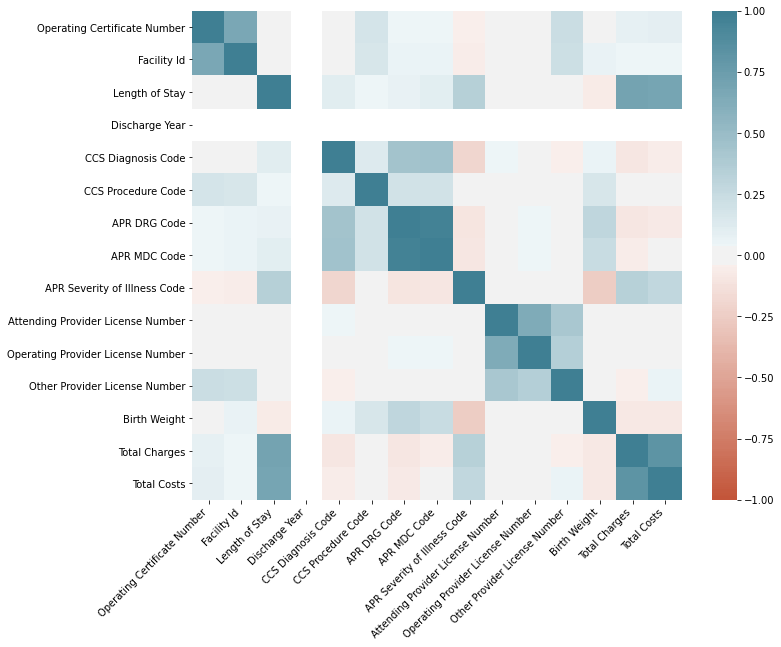

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From this initial look at a correlation matrix of our data, we can see that a couple of features have relatively strong positive correlation with each other, and more importantly, length of stay. Although the correlation matrix does not make sense to look at for all of our columns, we can see from it that APR Severity of Illness Code has a strong positive correlation with length of stay, along with total charges and total costs. CCS Diagnosis code also seems to have a slight positive correlation with length of stay. We can see other positive correlations in the dataset between features such as CCS Diagnosis codes and APR DRG codes.  

# Exploratory Data Analysis & Data Visualization

In this section, I will explore and visualize underlying relationships in the data. For the following analysis, I keep length of stay as the primary varaiable along the y-axis since it is the predictor variable for this project. Thus, I am most interested at looking how features in this dataset affect length of stay. Some of the features found to have the most variance in length of stay are listed below:



*   Payment Typology
*   Severity of Illness
*   Age Group
*   Type of Admission





First, let's look at the univariate distribution of length of stay values in the dataset

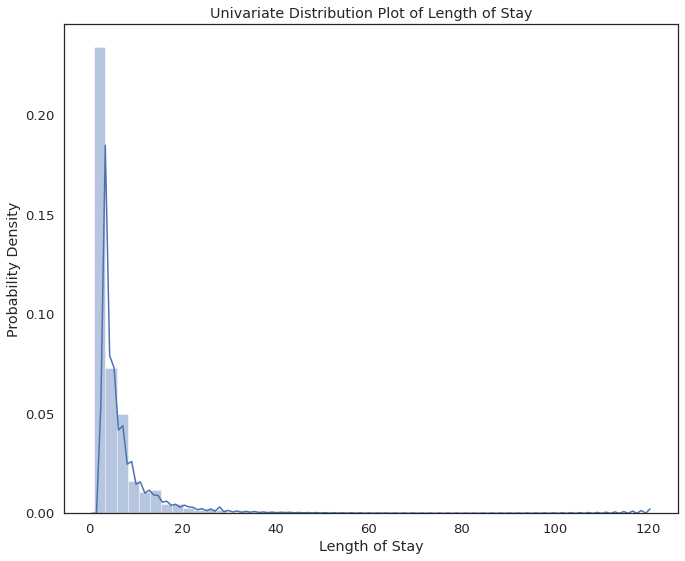

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['Length of Stay'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

We can see this distribution is very skewed. Let's take a look at birthweight next as I noticed that the range of the value seems odd. From the df.describe() output, we can see that the 25%, 50% and 75% quartile of values are all 0. The histogram below confirms that most of the birth weights are 0. This makes sense when we consider that this column is probably only relevant for new born babies, and is entered as 0 for all other patients. Let's confirm this with some further analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


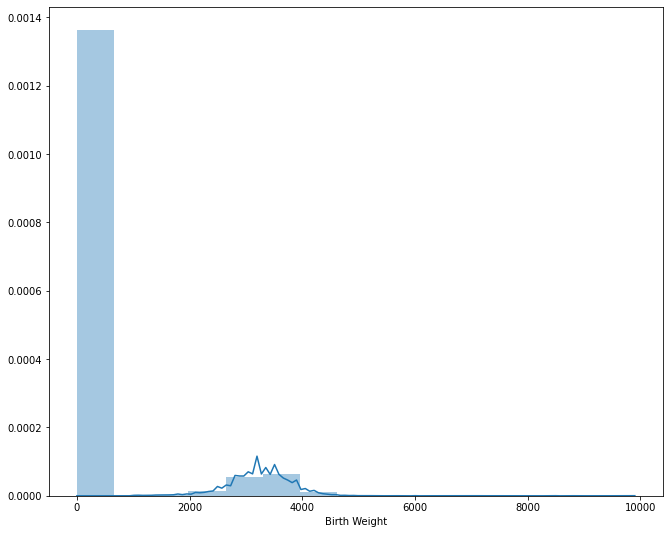

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['Birth Weight'], bins=15);

In [0]:
#Lets see if we can confirm that there is data only input for the youngest age group

birth_weight_df = df[['Type of Admission', 'Birth Weight']].groupby('Type of Admission').mean()
display(birth_weight_df)
weight_age_df = df[['Age Group', 'Birth Weight']].groupby('Age Group').mean()
display(weight_age_df)

Birth Weight
Type of Admission              
Elective               5.034854
Emergency             10.307987
Newborn             3259.013067
Not Available         42.820513
Trauma                 2.205882
Urgent                47.163954

Birth Weight
Age Group                
0 to 17        2172.11362
18 to 29          0.00000
30 to 49          0.00000
50 to 69          0.00000
70 or Older       0.00000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


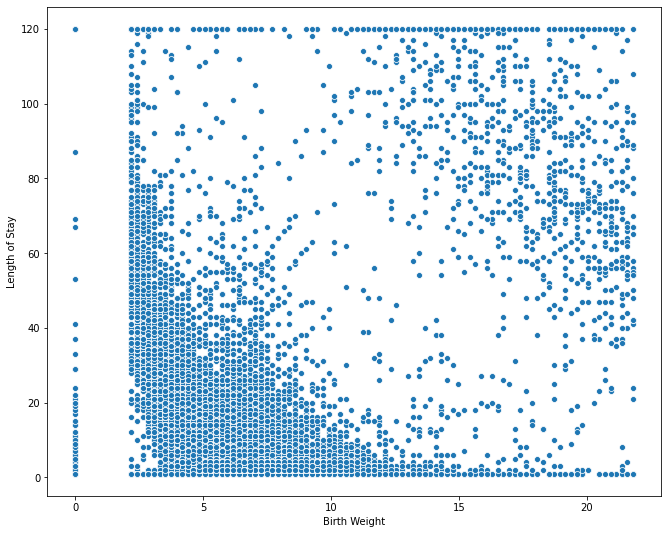

In [0]:
#Lets look at the relationship between birth weight and length of stay only for the newborns as this feature makes the most sense
#for this group

birth_youngest_stay = df[df['Type of Admission'].str.contains('Newborn')]
birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454)) #convert from grams to pounds
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x="Birth Weight", y="Length of Stay",
                data=birth_youngest_stay)


When looking at a scatter plot of birth weight and length of stay, we can see two distinct clusters - one at the lower left hand corner and one at the upper right. It is interesting to see some newborns with a birth weight of approximately 20 pounds (newborns must be a loose term here and it is most likely referring to children under a certain age). These babies seem to have particularly long lengths of stay as they are clustered at the top right hand corner of the graph. This indicates to me that birth weight might be an important feature for predicting length of stay for newborns. However, for the rest of patients, the data does not contain much value as over 75% of the values are 0. This column will be dropped for the bulk of the analysis, with the option of being added back in to create a model separately for new born babies. 

Next, I am curious what the babies who have the longest lengths of stay are diagnosed with.

In [0]:
longest_newborn_df = birth_youngest_stay[birth_youngest_stay['Length of Stay']==120]
display(longest_newborn_df)


Health Service Area Hospital County  ...  Total Charges  Total Costs
45429            Western NY            Erie  ...     1350063.88    603986.00
45432            Western NY            Erie  ...     3225104.60   1122211.52
45435            Western NY            Erie  ...     1352197.18    400216.33
45437            Western NY            Erie  ...     2217067.21    711364.91
45438            Western NY            Erie  ...     1780114.70    632844.31
...                     ...             ...  ...            ...          ...
2062660         Long Island          Nassau  ...     2692575.41    794690.09
2066041         Long Island          Nassau  ...      942167.04    313988.51
2069788         Long Island          Nassau  ...     1045969.01    322775.89
2301522         Long Island         Suffolk  ...      983968.90    218785.92
2311437         Long Island         Suffolk  ...     1085307.00    242279.52

[204 rows x 33 columns]

I am interested in seeing what procedures the babies who stayed in the hospital for 120 days or longer had to recieve. A frequency plot for each procedure description in this group of newborns is shown below

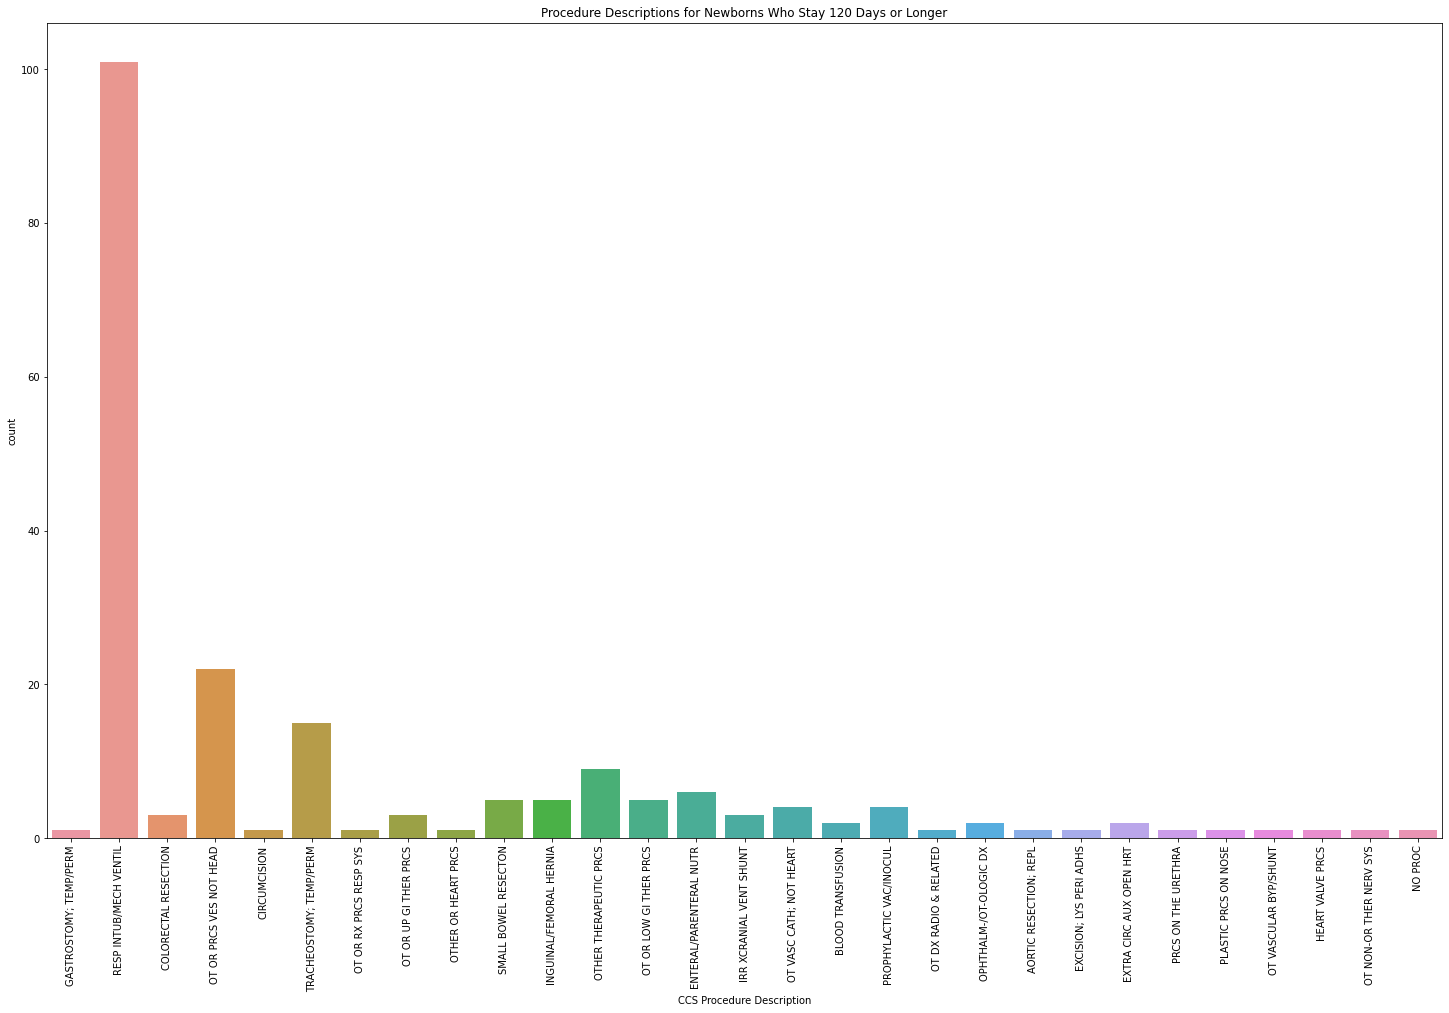

In [0]:
f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(x='CCS Procedure Description', data = longest_newborn_df)
plt.xticks(rotation=90)
plt.title('Procedure Descriptions for Newborns Who Stay 120 Days or Longer')
plt.show()

Most of the babies in this group required a ventilator. This may imply that if a baby requires to be put on a ventilator and is having respiratory issues, there is a high probability that they will have a long stay at the hospital (120+ days)

Below, I begin the bulk of the exploratory data visualization for this project as I analyze the relationships bewteen various features and the predictor feaature for this project: length of stay. Major takeaways and interpretations are described below each figure. However, many of the graphs are pretty intuitive and simply show an interesting underlying relationship between features

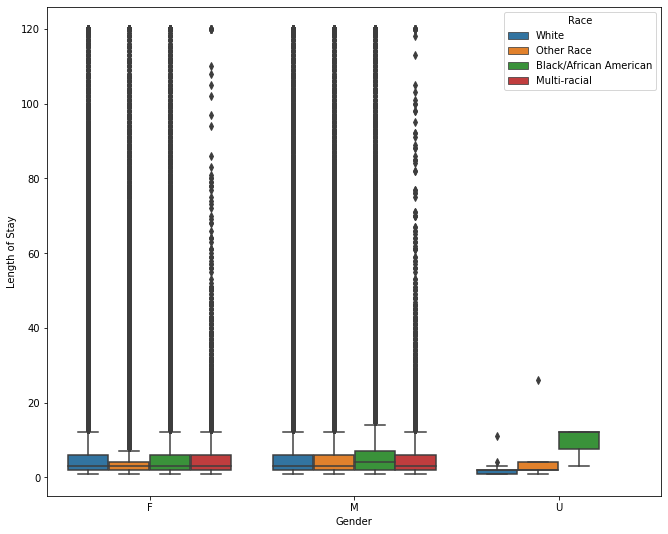

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Length of Stay",
            hue="Race",
            data=df)

We can see the length of stay data is very skewed across all genders and races, which makes it difficult to see relationships. I will limit the range of the y axis from now on in order to more clearly see all underlying distributions

[(0.0, 30.0)]

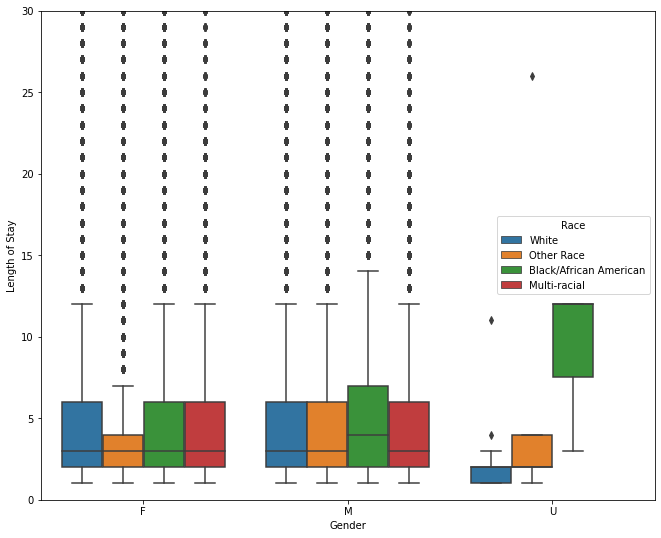

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Length of Stay",
            hue="Race",
            data=df)
ax.set(ylim=(0, 30))

[(0.0, 30.0)]

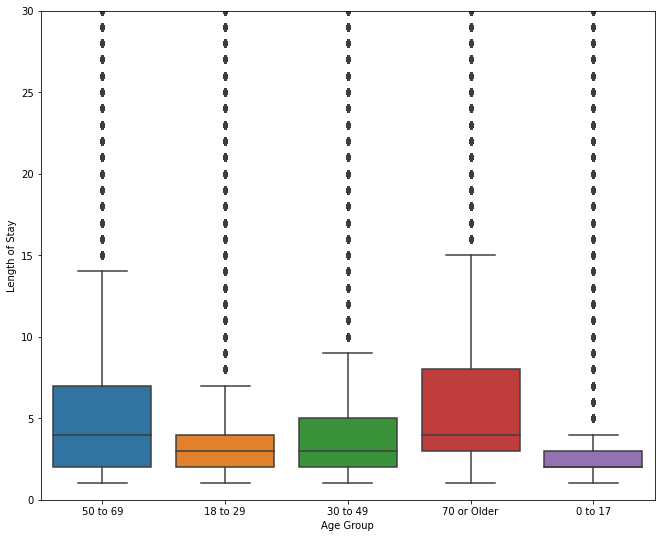

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 30))

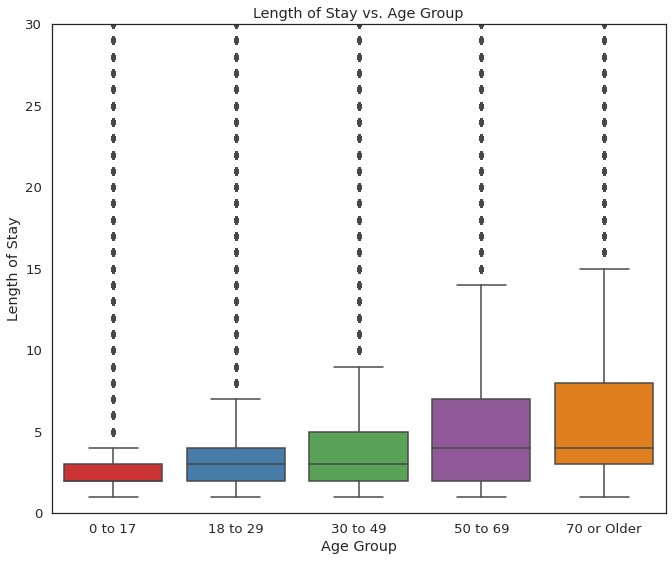

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],
            palette="Set1", data=df)
ax.set(ylim=(0, 30))
plt.title('Length of Stay vs. Age Group')
plt.show()

Here, we can see some significant variance in length of stay across different age groups. It is evident that age groups 50-69 and 70 or older tend to have the longest stay distributions

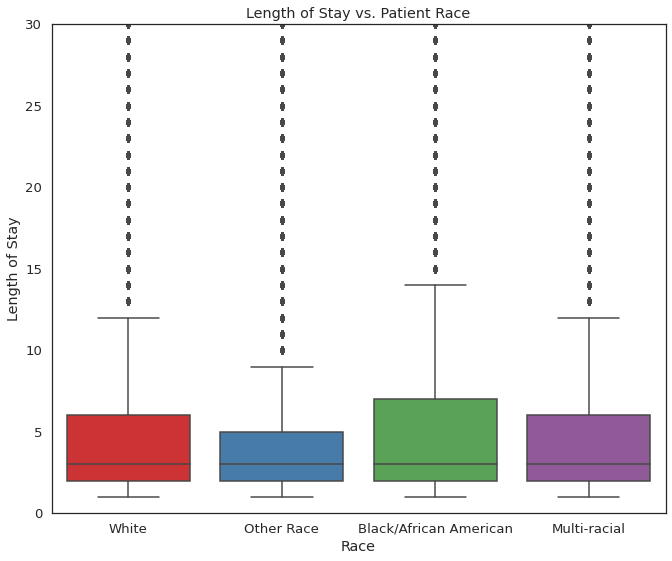

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Race", y="Length of Stay", data=df, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

What is the average length of stay for each diagnosis description in the dataset?

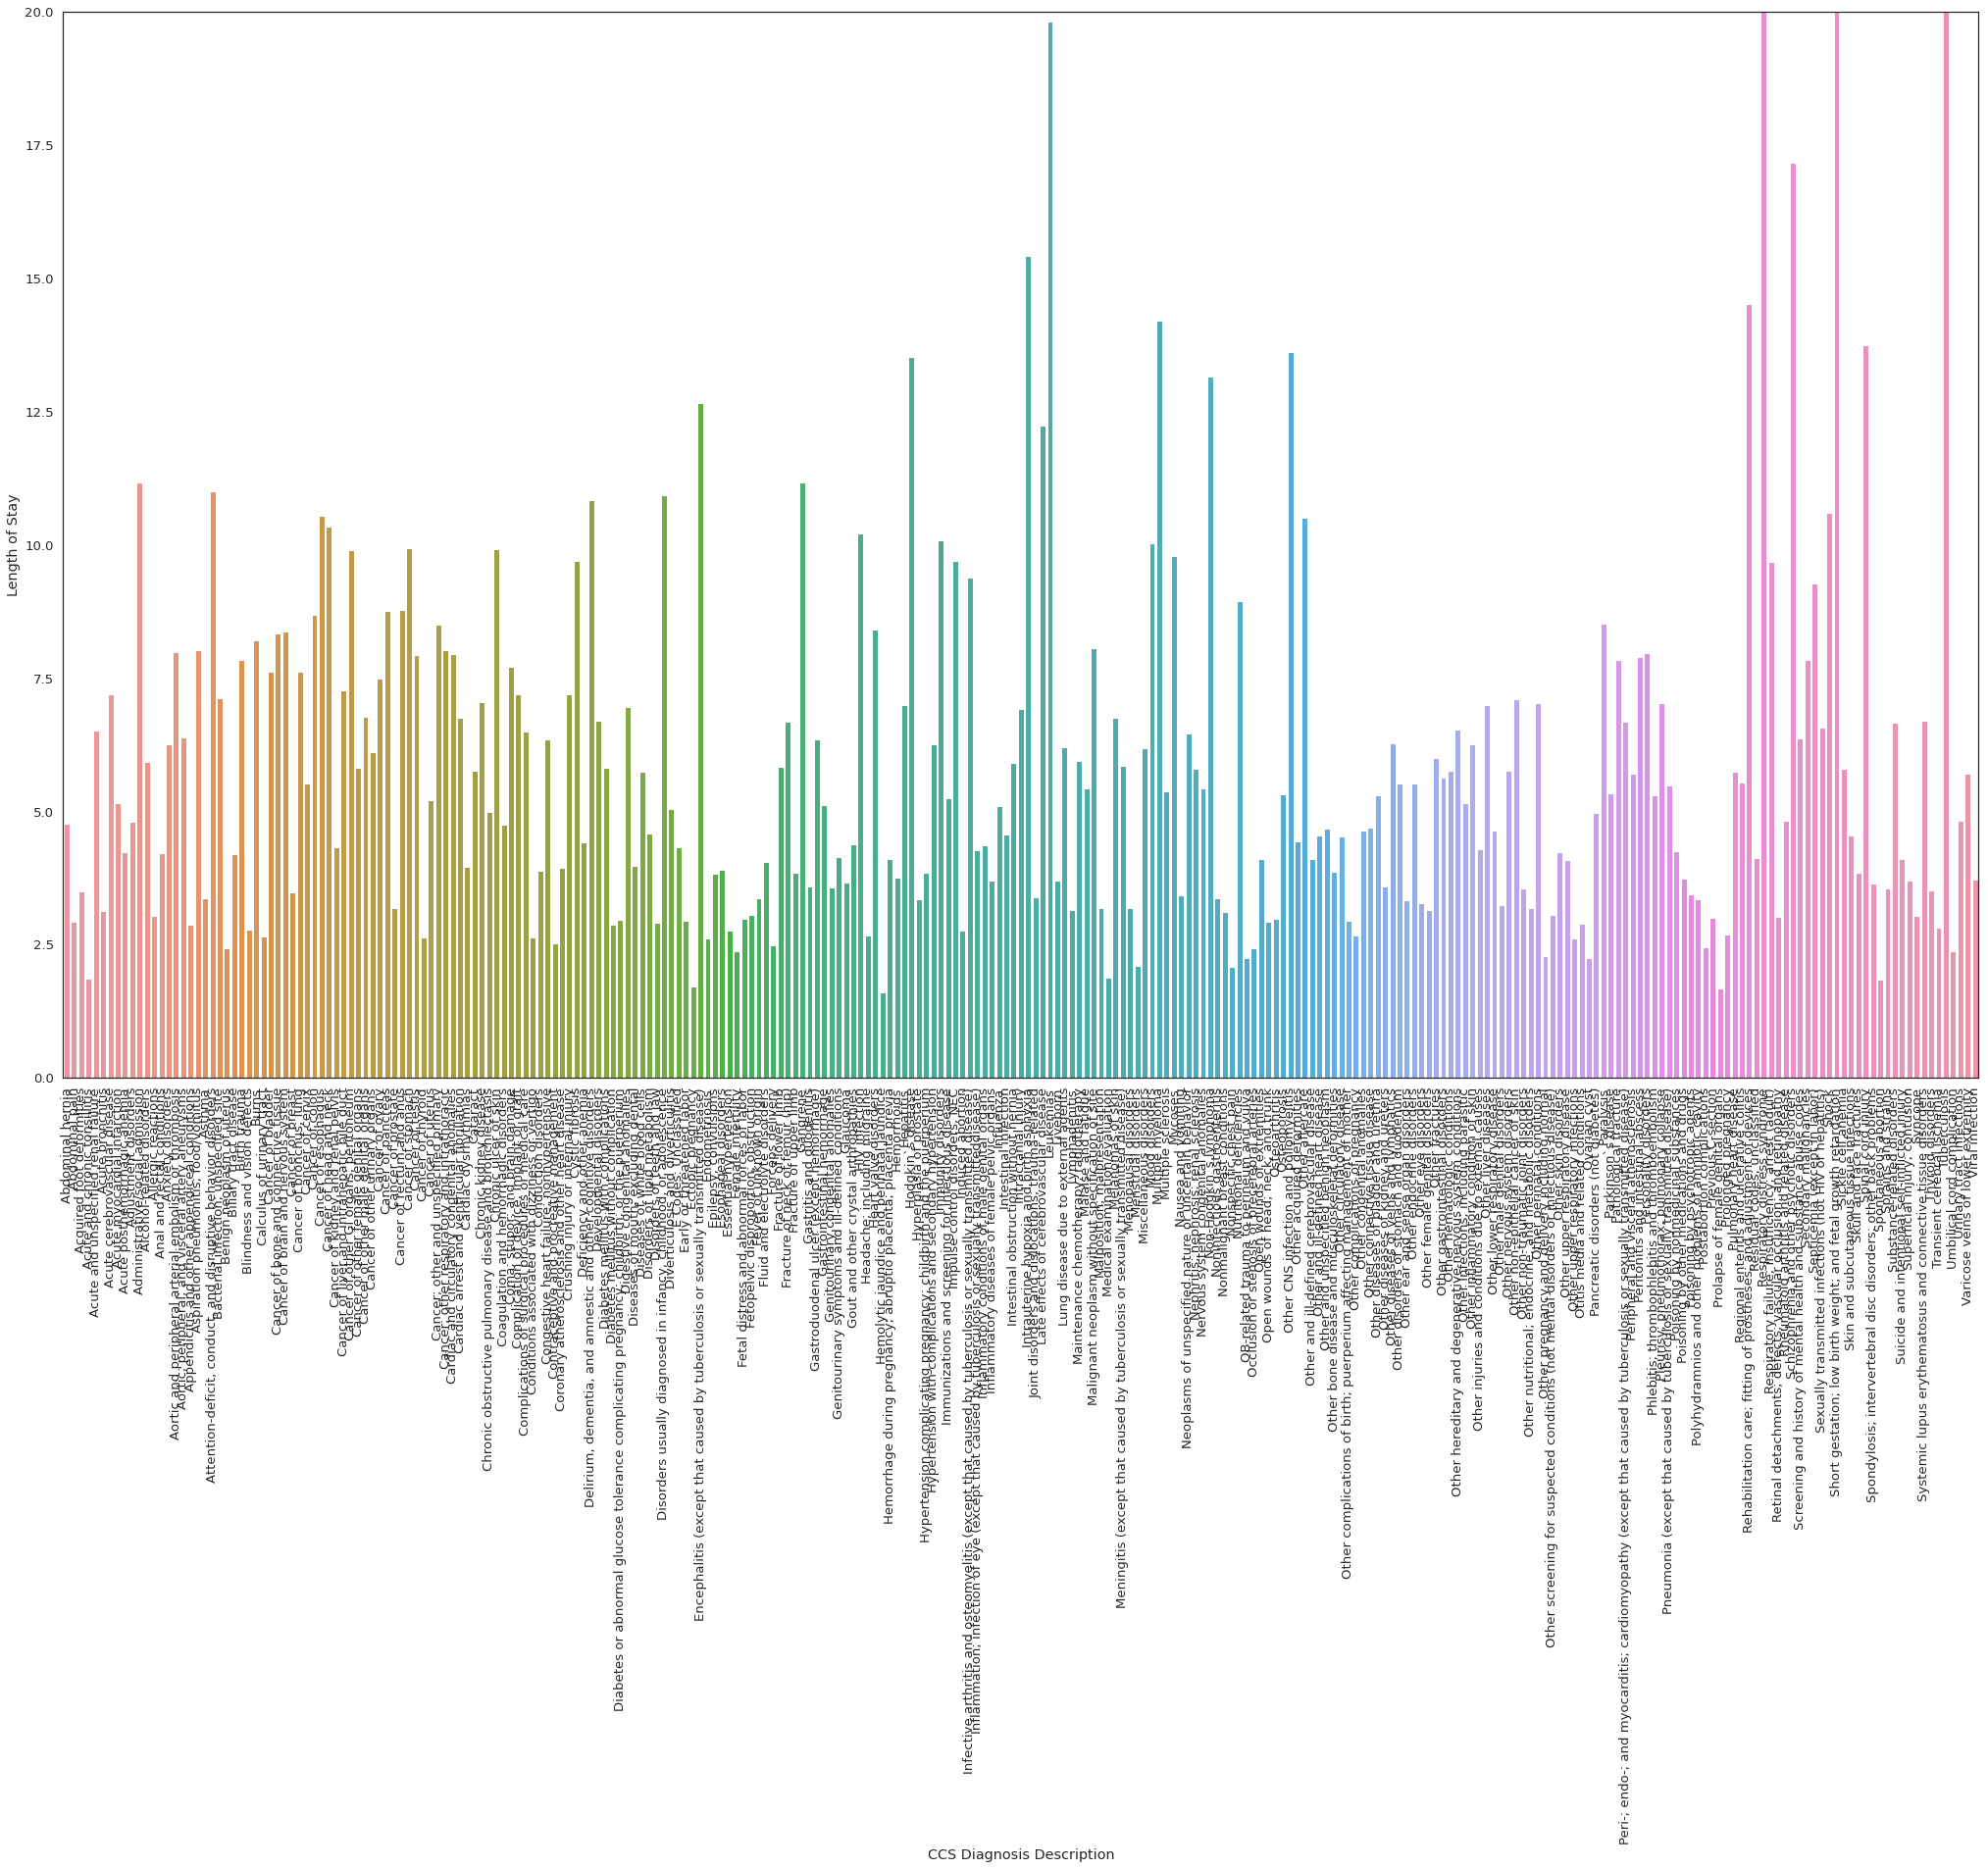

In [0]:
#Do a groupby and then bar plot here
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(35, 20))
sns.barplot(x="CCS Diagnosis Description", y="Length of Stay", data=df[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean())
ax.set(ylim=(0, 20))
plt.xticks(rotation=90)
plt.show()

This plot makes it nice to visualize the spread of length of stay values for different diagnoses, but there are a lot of categories which makes it difficult to read. Let's create a dataframe and list diagnoses in descending order of average length of stay to see the diagnosis descriptions that have the longest length of stay.

In [0]:
diag_stay_df = df[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_stay_df = diag_stay_df.sort_values(by='Length of Stay', ascending=False, ignore_index=True)
display(diag_stay_df)

CCS Diagnosis Description  Length of Stay
0    Short gestation; low birth weight; and fetal g...       31.591017
1                        Respiratory distress syndrome       23.727660
2                                         Tuberculosis       21.489237
3                                            Leukemias       19.822296
4          Schizophrenia and other psychotic disorders       17.168233
..                                                 ...             ...
258                      Acute and chronic tonsillitis        1.870309
259                               Spontaneous abortion        1.851351
260                                  Ectopic pregnancy        1.705751
261                  Prolapse of female genital organs        1.683635
262          Hemolytic jaundice and perinatal jaundice        1.604728

[263 rows x 2 columns]

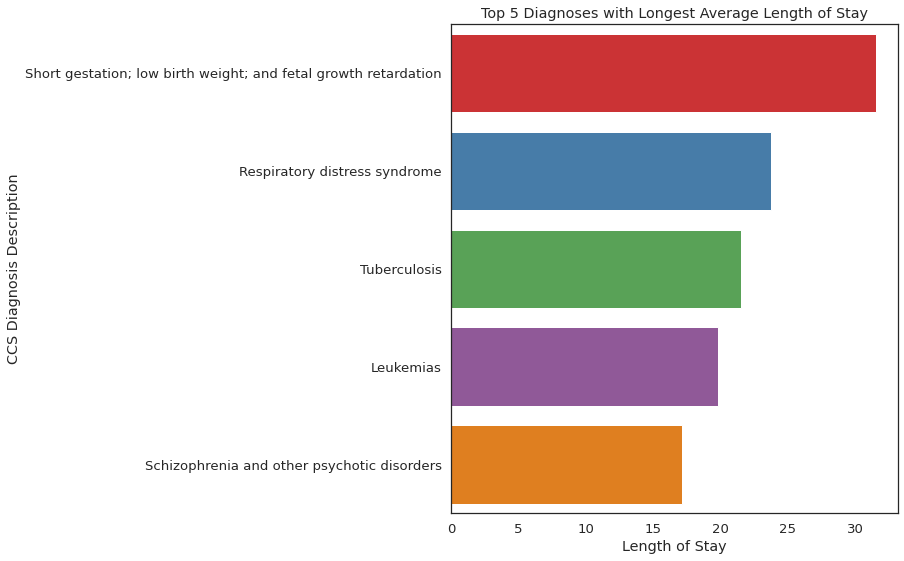

In [0]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=diag_stay_df[0:5], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 5 Diagnoses with Longest Average Length of Stay')
plt.show()

Let's see which diagnosis descriptions cost the hospital the most money

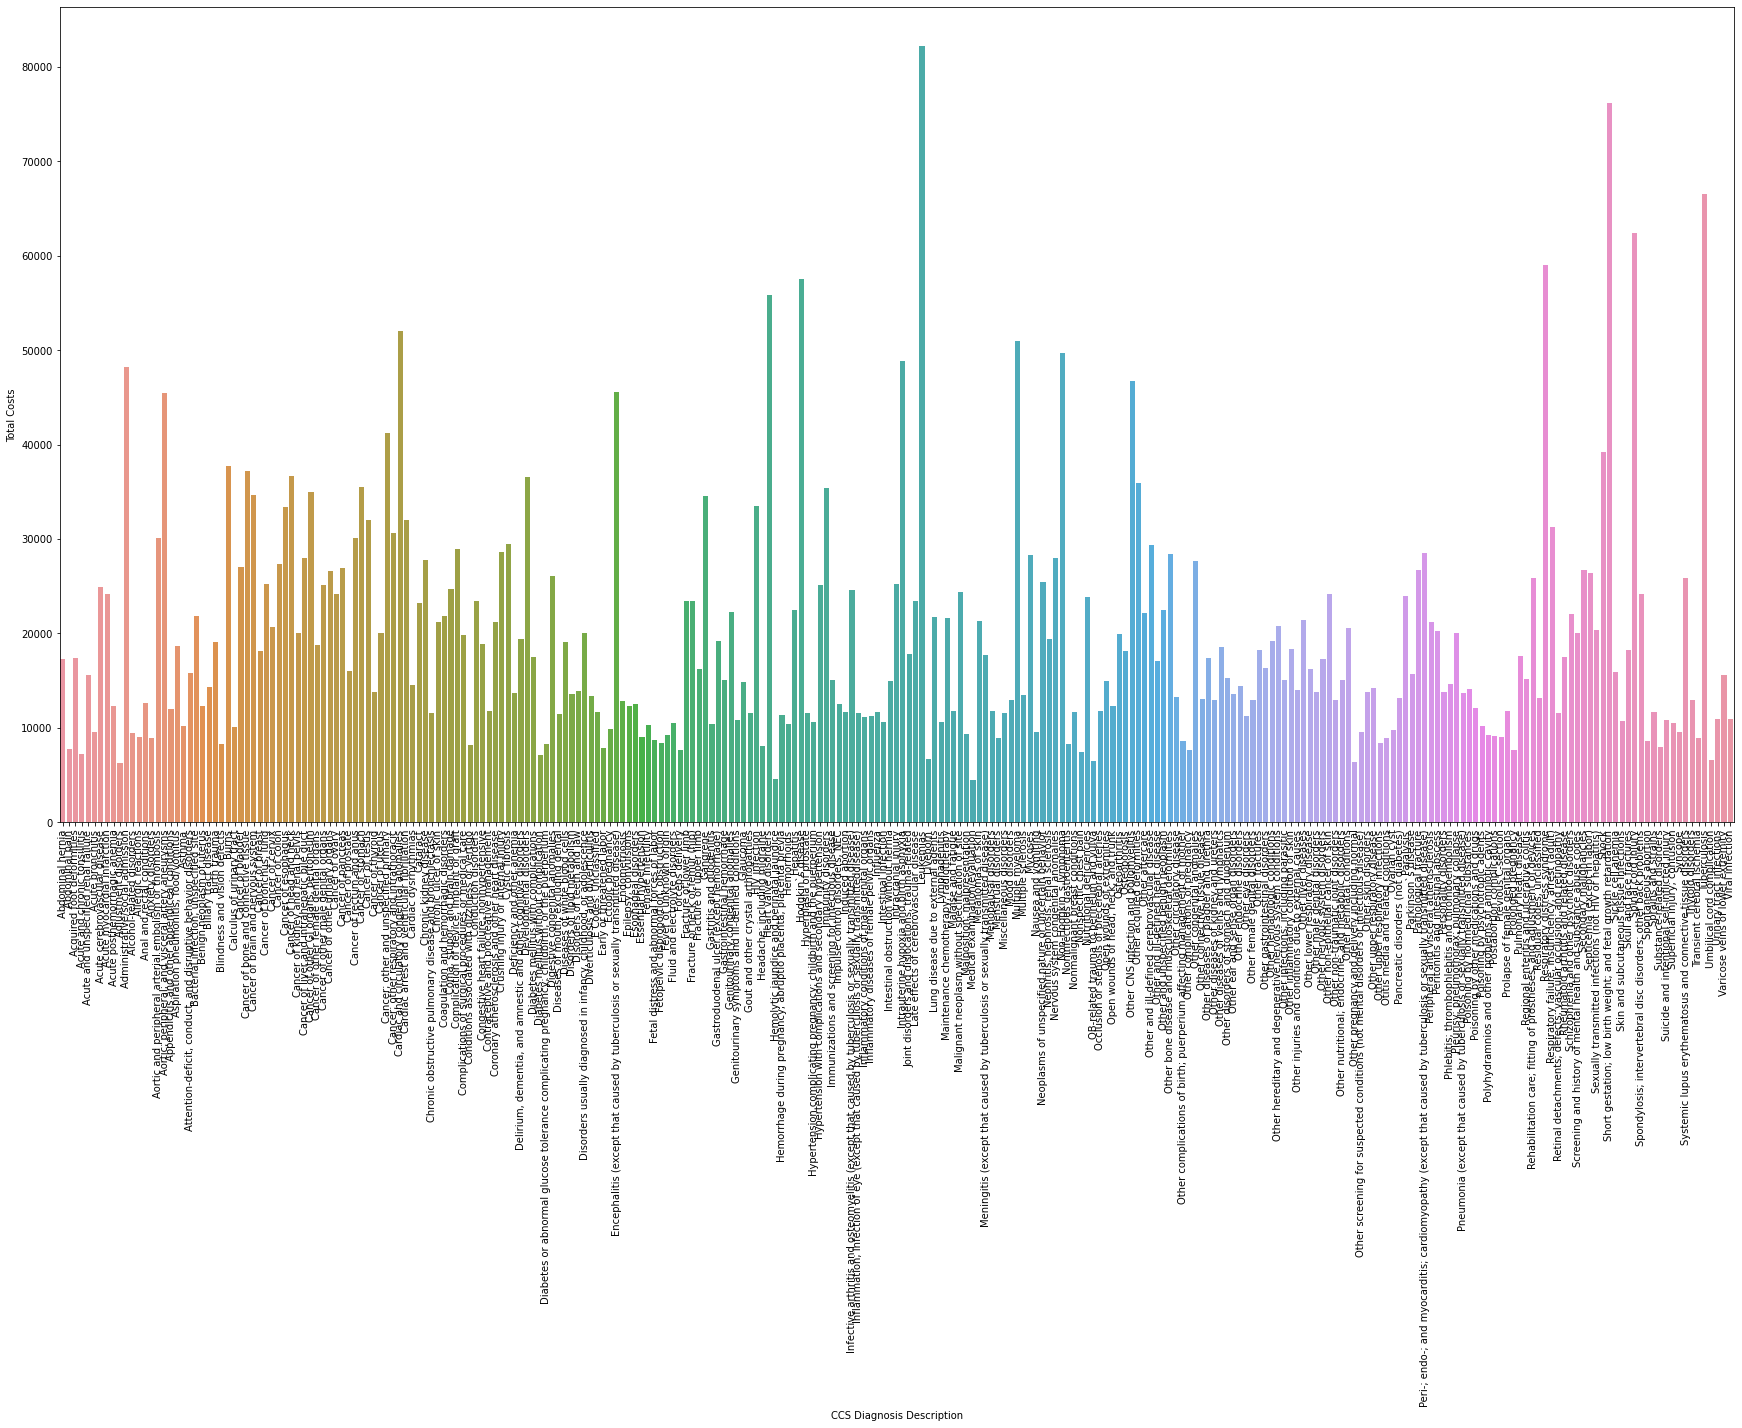

In [0]:
f, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x="CCS Diagnosis Description", y="Total Costs", data=df[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean())
plt.xticks(rotation=90)
plt.show()

Again, this plot is hard to read so lets print out a dataframe with the rows listed in descending order of cost

In [0]:
diag_costs_df = df[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_costs_df = diag_costs_df.sort_values(by='Total Costs', ascending=False, ignore_index=True)
display(diag_costs_df)


CCS Diagnosis Description   Total Costs
0                                            Leukemias  82255.539414
1    Short gestation; low birth weight; and fetal g...  76227.177045
2                                         Tuberculosis  66563.343562
3                                   Spinal cord injury  62398.305067
4                        Respiratory distress syndrome  59006.072000
..                                                 ...           ...
258            OB-related trauma to perineum and vulva   6491.679341
259      Other pregnancy and delivery including normal   6419.875510
260                               Adjustment disorders   6325.364765
261          Hemolytic jaundice and perinatal jaundice   4596.355803
262                     Medical examination/evaluation   4502.010203

[263 rows x 2 columns]

Next, through the use of an inner join, let's see how the diagnosis descriptions that cost the most compare with their length of stay

In [0]:
#Rank the total costs and then do an inner join
diag_costs_df = diag_costs_df.reset_index()
joined_df = diag_stay_df.merge(right=diag_costs_df, how='inner', on='CCS Diagnosis Description')
display(joined_df)

CCS Diagnosis Description  ...   Total Costs
0    Short gestation; low birth weight; and fetal g...  ...  76227.177045
1                        Respiratory distress syndrome  ...  59006.072000
2                                         Tuberculosis  ...  66563.343562
3                                            Leukemias  ...  82255.539414
4          Schizophrenia and other psychotic disorders  ...  22106.462457
..                                                 ...  ...           ...
258                      Acute and chronic tonsillitis  ...   7233.839857
259                               Spontaneous abortion  ...   8594.514324
260                                  Ectopic pregnancy  ...   9876.683682
261                  Prolapse of female genital organs  ...  11742.817702
262          Hemolytic jaundice and perinatal jaundice  ...   4596.355803

[263 rows x 4 columns]

We can see that there is definitely a strong relationship between the most expensive diagnoses and a longer inpatient length of stay. However, for example, the diagnosis description with the second longest average length of stay is only the fifth most expensive to the hospital

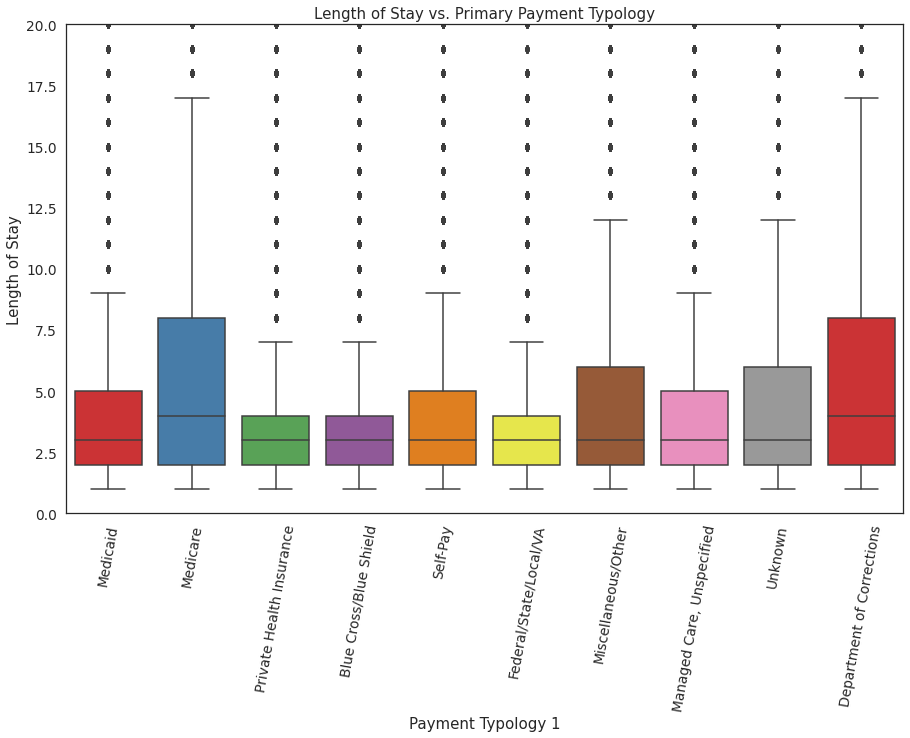

In [0]:
sns.set(font_scale=1.25)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 9))
sns.boxplot(x="Payment Typology 1", y="Length of Stay", data=df, palette='Set1')
#plt.title('Type of Patient Payments vs. Length of Stay')
ax.set(ylim=(0, 20))
plt.xticks(rotation=80)
plt.title('Length of Stay vs. Primary Payment Typology')
plt.show()

Here, we see another feature that has a significant amount of variance in length of stay across its categories. Medicare patients tend to have one of the longest length of stays. This may be because most medicare patients are in an older age bracket. Let's see if we can visually support this hypothesis

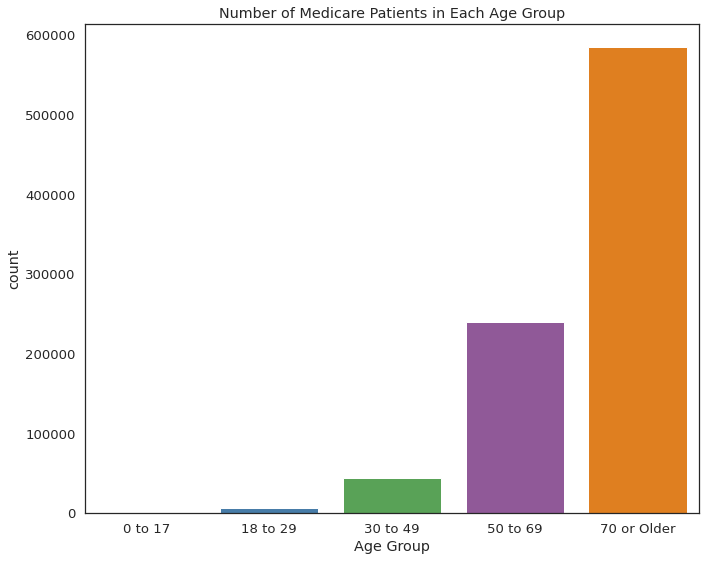

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x='Age Group', data = df[df['Payment Typology 1']=='Medicare'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set1')
plt.title('Number of Medicare Patients in Each Age Group')
plt.show()

This hypothesis is supported by the graph above. Age/Payment typology seem to be correlated in some ways, and these seem like they have an effect on the length of stay of the patient

Next, let's take a look at how length of stay varies across different patient zip code areas

[(0.0, 20.0)]

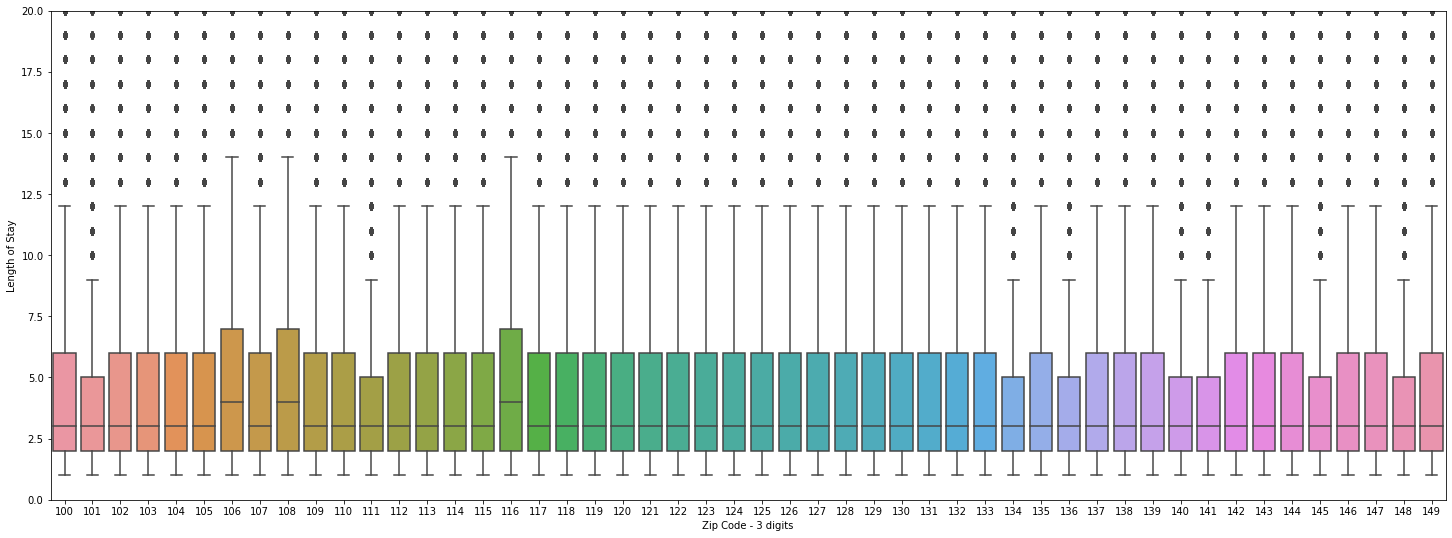

In [0]:
f, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(x="Zip Code - 3 digits", y="Length of Stay", data=df)
ax.set(ylim=(0, 20))

The plots above urge me to wonder how much income has an affect on length of stay since we can see differences across zipcodes and health insurance programs, which are highly correlated with income differences. Let's see if we can webscrape the income for each 3-digit zipcode provided and see if a relationship between these variables truly does exist. 

# Webscraping

This section primarily serves to extract a more useful feature than raw zipcode for the models I will train: webscraped average income data for each zipcode. Following this section, I will be able to make use of this feature instead of having to encode the zipcode column, which could have the result of drastically increasing the dimensionality of my dataset if the column is one hot encoded. Furthermore, patterns in average income may be more informative for any given model than a raw zipcode

In [6]:
#Scraped income data by zipcode from web (data from 2006-2010)
!pip install requests
import requests
dls = "https://www.psc.isr.umich.edu/dis/census/Features/tract2zip/MeanZIP-3.xlsx"
resp = requests.get(dls)

output = open('zip_incomes.xlsx', 'wb')
output.write(resp.content)
output.close()

In [7]:
import numpy as np
zip_income_df = pd.read_excel('zip_incomes.xlsx')
display(zip_income_df)

Zip      Median     Mean    Pop
0       1001  56662.5735  66687.8  16445
1       1002  49853.4177  75062.6  28069
2       1003  28462.0000    35121   8491
3       1005  75423.0000    82442   4798
4       1007  79076.3540    85802  12962
...      ...         ...      ...    ...
32629  99923  43625.0000    42895     87
32630  99925  50357.0000    63808    819
32631  99926  44063.0000    51660   1460
32632  99927  41815.0000    55501     94
32633  99929  50389.0000    69595   2338

[32634 rows x 4 columns]

Now, we only want 5 digit zipcodes at first (since some zipcodes in the table have 4 digits. These zipcodes are assumed to have a 0 at the beginning, which would place them in areas such as Massachusetts). Next, I will truncate the zipcodes to only contain the first three digits. This is because HIPAA regulations result in only the 3-digit zipcode data being available. Therefore, the zipcodes in the dataset only have 3 digits. As such, I will do an aggregate mean on the zipcodes with the same first three digits to get an average income for all zipcodes which share the same first three digits. 

In [8]:
import math
zip_income_df['Zip'] = zip_income_df['Zip'].apply(lambda x: int(x))
income_df = zip_income_df[zip_income_df['Zip'] > 9999]
income_df['Zip'] = income_df['Zip'].apply(lambda x: math.floor(x/100)) #cut down zip code to just first three digits
display(income_df)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Zip       Median     Mean    Pop
2391   100   71244.6100   123113  17678
2392   100   30843.9574  46258.6  70878
2393   100   89998.5339   139331  53609
2394   100  110183.6857   156683   1271
2395   100  115133.2855   163763   1517
...    ...          ...      ...    ...
32629  999   43625.0000    42895     87
32630  999   50357.0000    63808    819
32631  999   44063.0000    51660   1460
32632  999   41815.0000    55501     94
32633  999   50389.0000    69595   2338

[30243 rows x 4 columns]

In [0]:
income_df.dtypes

Zip         int64
Median    float64
Mean       object
Pop         int64
dtype: object

Now, lets group by and join using SQL commands to do this most efficiently. Not only is this more intuitive to write, but we can make sure that we are utilizing any behind the scenes query optimization built into the SQL language. Median income is used since income distributions are known to be skewed, and median provides a better measure of central tendency for these distributions

In [9]:
! pip install pandasql
from pandasql import *

query = '''SELECT ZIP, AVG(MEDIAN) as median FROM income_df GROUP BY ZIP'''
avg_income = sqldf(query, locals())
display(avg_income)


  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=e0ef15757f6feb87638eec9418b32dc1441943f29c57950aa9fb11045fbd128f
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


Zip         median
0    100   74696.827231
1    101   84605.396971
2    102  101671.417750
3    103   69452.579158
4    104   34690.563752
..   ...            ...
803  995   54651.818078
804  996   48525.824611
805  997   48672.156488
806  998   55919.595507
807  999   47010.321873

[808 rows x 2 columns]

In [10]:
#Now, we can inner join this onto our dataframe to get the average income for each patient zipcode

avg_income['Zip'] = avg_income['Zip'].astype('object')

query = '''SELECT d.*, a.median as AvgIncome FROM df d inner join avg_income a on d.'Zip Code - 3 digits' = a.Zip'''
df = sqldf(query, locals())
display(df)

Health Service Area Hospital County  ...  Total Costs     AvgIncome
0                Western NY     Cattaraugus  ...      4561.28  42056.315725
1                Western NY     Cattaraugus  ...      6933.94  42056.315725
2                Western NY     Cattaraugus  ...      7154.85  42056.315725
3                Western NY     Cattaraugus  ...      4584.11  42056.315725
4                Western NY      Chautauqua  ...      4361.74  42056.315725
...                     ...             ...  ...          ...           ...
2342216         Long Island         Suffolk  ...      6637.09  96822.769957
2342217         Long Island         Suffolk  ...      3236.18  96822.769957
2342218         Long Island         Suffolk  ...      1862.39  78134.578472
2342219         Long Island         Suffolk  ...      2744.13  96822.769957
2342220         Long Island         Suffolk  ...      2128.89  96822.769957

[2342221 rows x 34 columns]

However, there is still one more issue we need to take care of. If you remember from above, I changed out of state zipcodes (encoded as OOS) to the number 999. Now, these zipcodes got joined with the average income for zipcodes associated with 999, even though they are not actually associated with this location. In order to deal with this, I will first find the most common health insurance program(s) for out of state patients (zipcode 999). Then, I will find the average income for this health insurance program(s) and use it for patients with zipcode 999 (out of state patients). 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

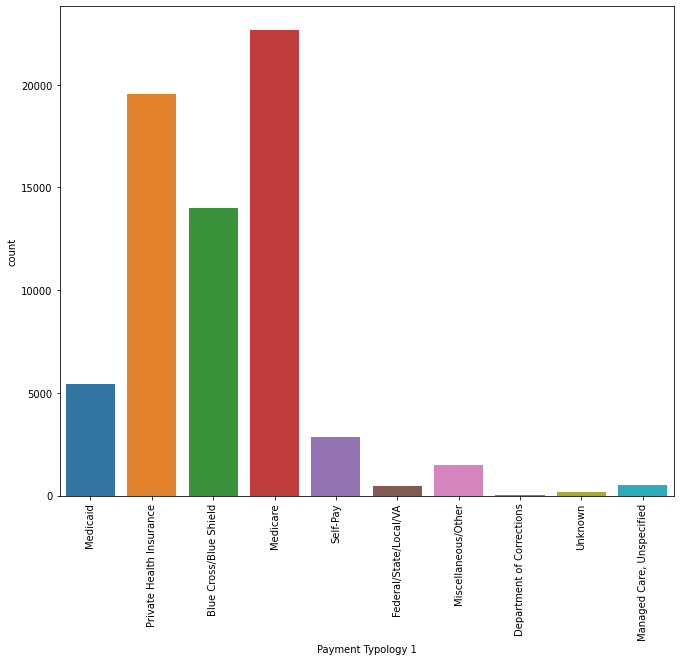

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x="Payment Typology 1",
            data=df[df['Zip Code - 3 digits']==999])
plt.xticks(rotation=90)

As illustrated by the plot above, medicare and private health insurance are the two most common health insurance programs. I will find the average income for these two programs and use that number as the income for all patients with zipcode 999. 

In [0]:
#for this calculation, I will exlclude the data with zipcode equal to 999
df_no999 = df[df['Zip Code - 3 digits'] != 999]
insurance_df = df_no999[df_no999['Payment Typology 1'].isin(['Medicare','Private Health Insurance'])]
mean_zip999 = insurance_df['AvgIncome'].mean()

In [13]:
#round zipcodes to make replace easier
df['AvgIncome'] = df['AvgIncome'].round(2)
df[df['Zip Code - 3 digits']==999]['AvgIncome']

30         47010.32
40         47010.32
120        47010.32
198        47010.32
203        47010.32
             ...   
2340786    47010.32
2341098    47010.32
2341216    47010.32
2341544    47010.32
2342188    47010.32
Name: AvgIncome, Length: 67141, dtype: float64

In [0]:
df = df.replace(47010.32, round(mean_zip999,2))

Below, I plot the zip code against average income to visualize the distribution of the data

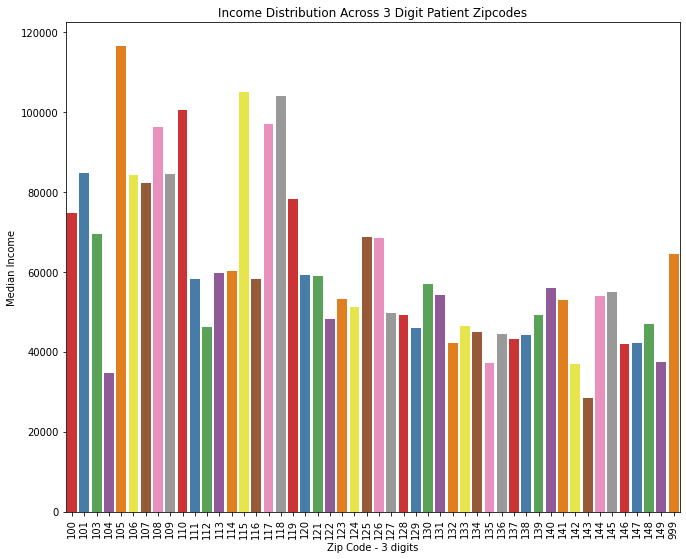

In [15]:
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x="Zip Code - 3 digits", y="AvgIncome",
            data=df, palette='Set1')
plt.ylabel('Median Income')
plt.title('Income Distribution Across 3 Digit Patient Zipcodes')
plt.xticks(rotation=90)
plt.show()

[(0.0, 20.0)]

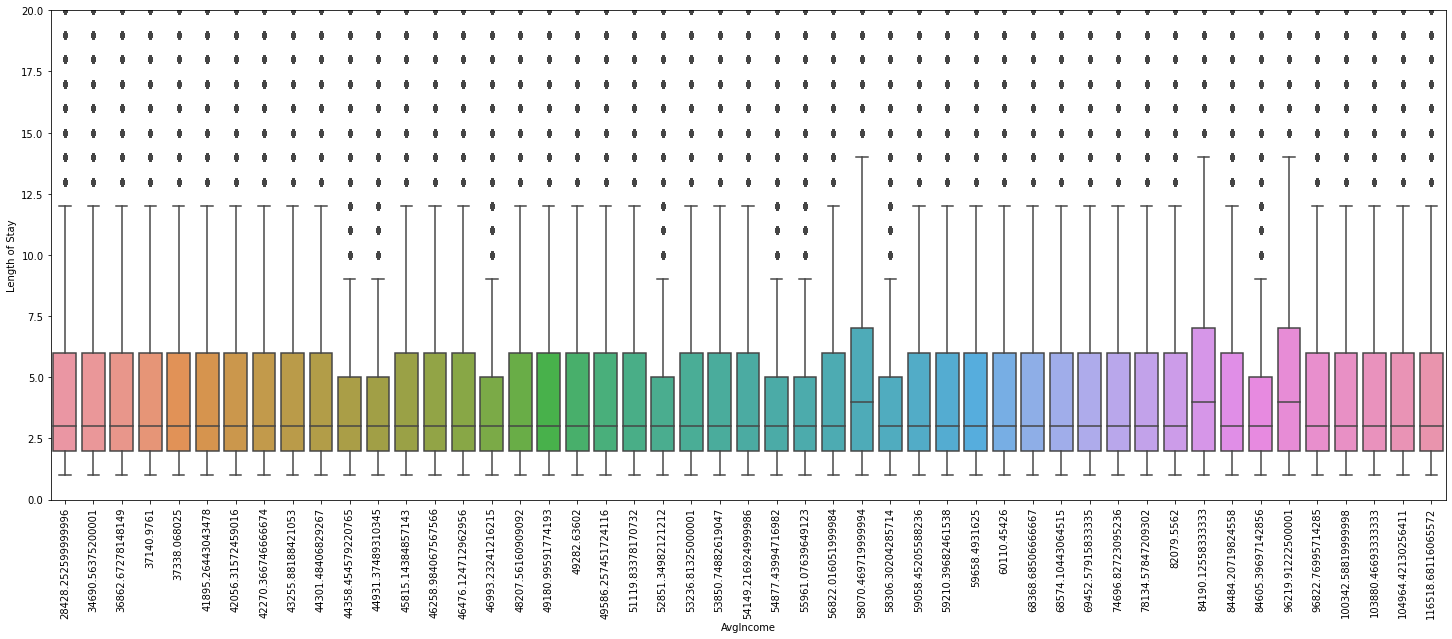

In [0]:
#From left to right we have increasing income, organized this way since the x-axis labels are hard to read
f, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(x="AvgIncome", y="Length of Stay",
            data=df.sort_values(by='AvgIncome', ascending=True))
plt.xticks(rotation=90)
ax.set(ylim=(0, 20))

We can see that there is not a huge amount of variation in length of stay across the zipcodes. However, they will still be more useful than the raw zipcode column, so I use average income as a feature instead in the modeling section of this project

# More Data Visualization

Now let's use this new webscraped feature to visuaize its correlation with other features in our dataset

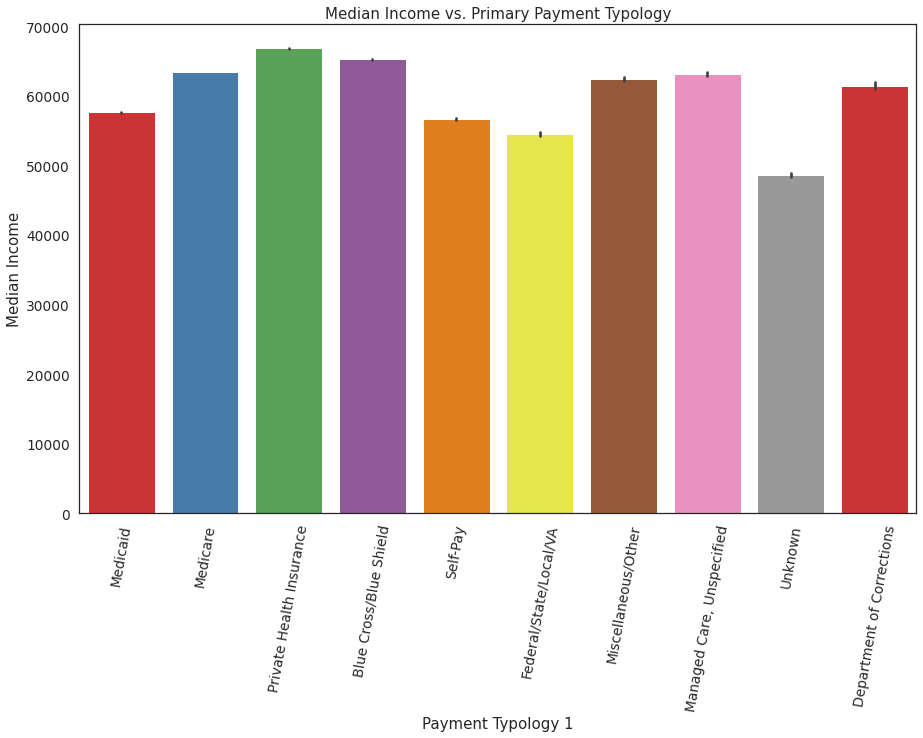

In [0]:
sns.set(font_scale=1.25)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x="Payment Typology 1", y="AvgIncome",
            data=df, palette='Set1')
plt.xticks(rotation=80)
plt.title('Median Income vs. Primary Payment Typology')
plt.ylabel('Median Income')
plt.show()

We can see some variance in average income across this feature, which makes sense as different insurance programs are more common for people from different economic backgrounds. This gives me confidence that my webscrape was at least somewhat useful, supporting the notion of proceeding with it as a feature

[(0.0, 20.0)]

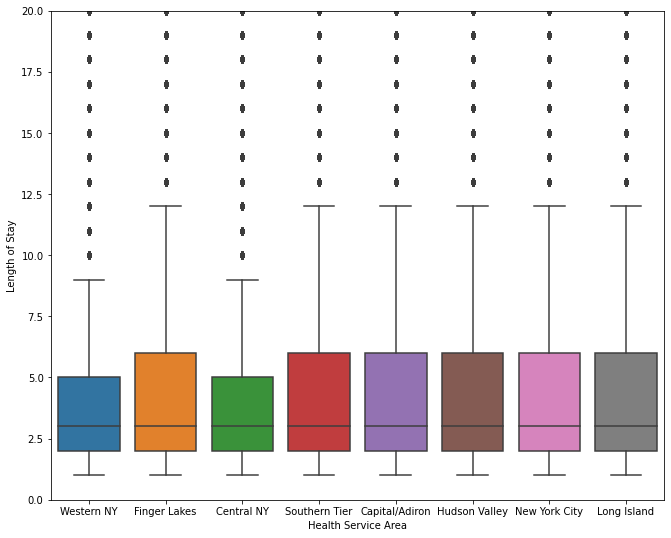

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Health Service Area", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20))

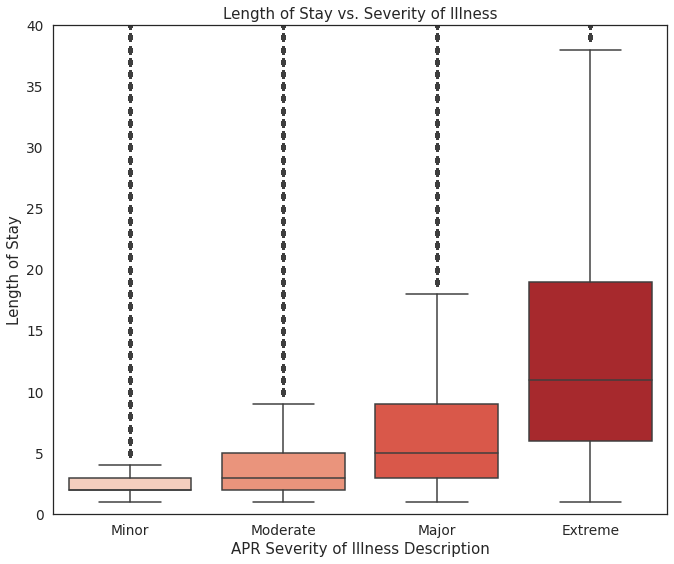

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Severity of Illness')
plt.show()

There is high amounts of variance in length of stay against the severity of illness feature. This will be an important feature to include in the model and will improve its predictive ability

[(0.0, 20.0)]

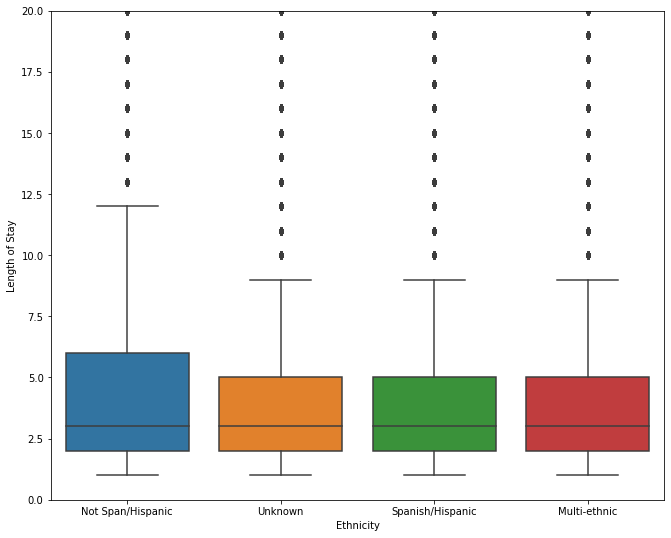

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Ethnicity", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20))

Here we can see the ethnicity column encodes less information then the Race column and does not have much variance across different ethnicities, so we will drop it later

[(0.0, 20.0)]

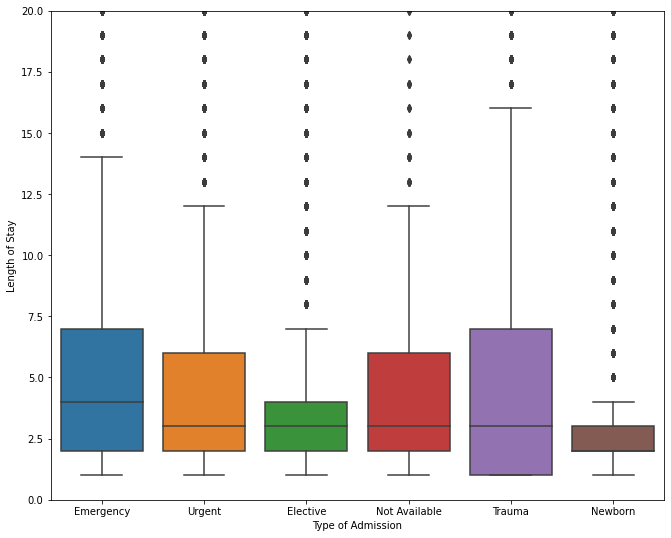

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20))

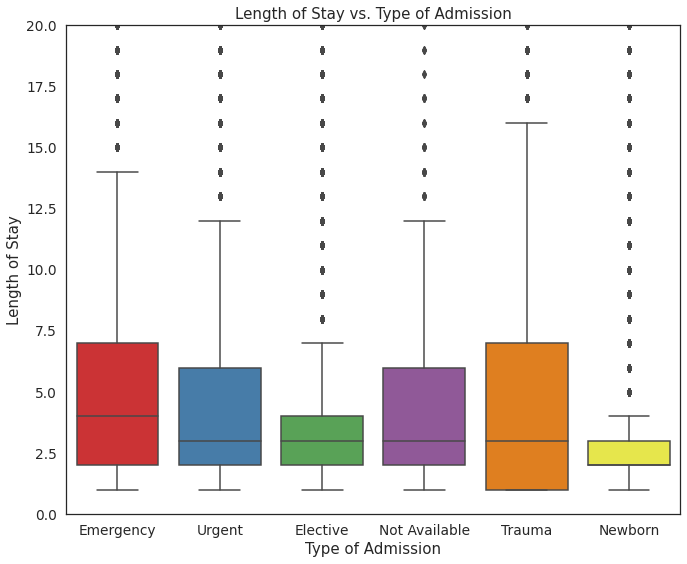

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",
            data=df, palette='Set1')
plt.title('Length of Stay vs. Type of Admission')
ax.set(ylim=(0, 20))
plt.show()

Let's visualize the positive linear relationship between length of stay and total costs, just out of curiousity for the slope of this correlation

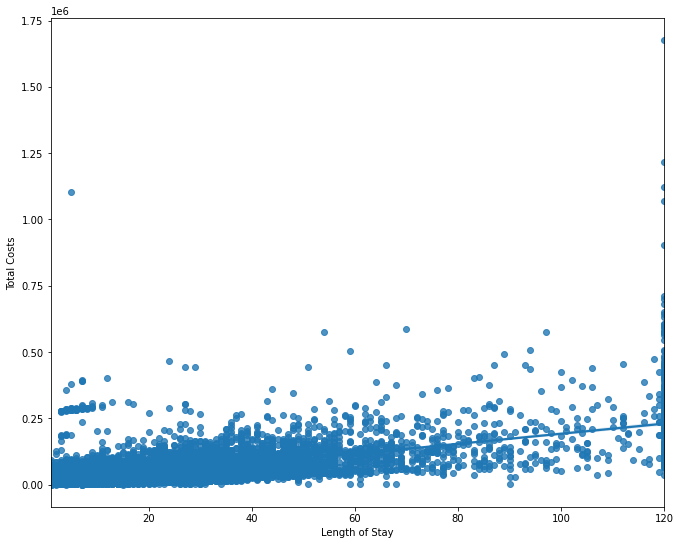

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
sns.regplot(x="Length of Stay", y="Total Costs",
            data=df[0:200000])

Let's also plot a frequency plot of severity of illness for all patients who stay for 120 days or longer

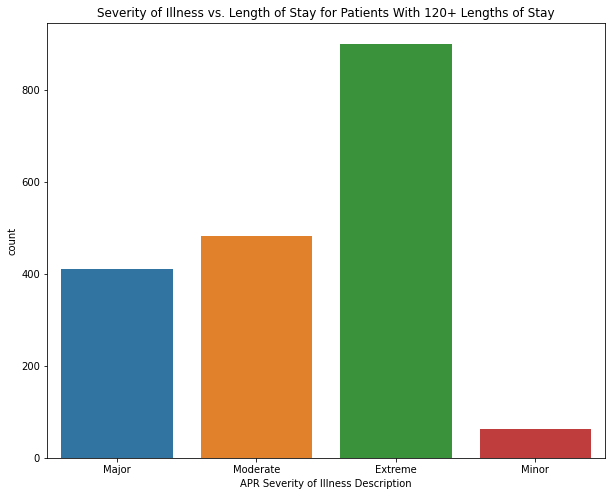

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='APR Severity of Illness Description', data = df[df['Length of Stay']==120])
plt.title('Severity of Illness vs. Length of Stay for Patients With 120+ Lengths of Stay')
plt.show()


We can see that of the approximately 1900 patients who have stays of 120 days or longer, most of them were extreme illnesses,
which makes sense. Now, lets visualize the univariate distributions of each of the variables through a pairplot, which provides a quick way of seeing this for all our numeric variables

# Wordclouds

In this section, I perform text parsing and analysis on diagnosis descriptions, followed by the creation of wordclouds to visualize these results. From this analysis, we can see stark differences in the diagnosis descriptions for each illness severity type. These differences are interesting to compare, and some of the results are summarized below:


*   Minor Illness: Pregnancy, disease, liveborn, complications, osteoarthritis
*   Moderate Illness: Schizophrenia, disease, complications, psychotic
*   Major Illness: Failure, disorders, acute
*   Extreme Illness: Septicemia, cerebrovascular, tuberculosis




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


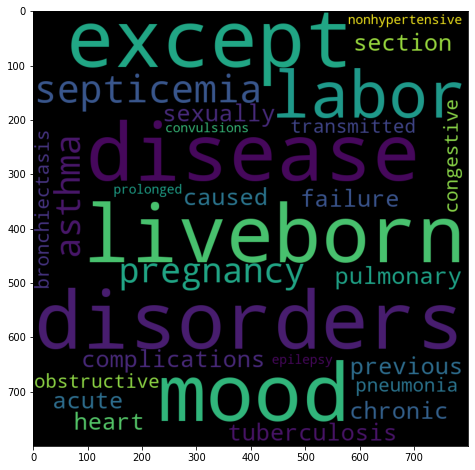

In [0]:
#Let's take a look at the most common diagnosis descriptions. There is a lot of data here so lets limit the entires we look at
diagnosis_desc_df = df[['CCS Diagnosis Description']][0:10000]
diagnosis_desc_df['CCS Diagnosis Description'] = diagnosis_desc_df['CCS Diagnosis Description'].astype('str', errors = 'ignore')
diagnosis_desc_df['CCS Diagnosis Description'] = diagnosis_desc_df['CCS Diagnosis Description'].apply(lambda x: x.lower())

list_of_titles = []
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
diagnosis_desc_df['Tokens'] = diagnosis_desc_df['CCS Diagnosis Description'].apply(lambda x: tokenizer.tokenize(x))
list_of_tokens = diagnosis_desc_df['Tokens'].tolist()
diagnosis_words = []
for sublist in list_of_tokens:
    for item in sublist:
        diagnosis_words.append(item)

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

#Let's remove stop words as well, such as "a", "and", and "the"
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
for word in list(diagnosis_words):
    if word in stop_words:
        diagnosis_words.remove(word)

from collections import Counter
Counter1 = Counter(diagnosis_words)
most_occur = Counter1.most_common(30) 
diagnosis_counter = []
for item in most_occur:
  diagnosis_counter.append(item[0])

#Create word cloud plot
cloud_words = ' '
for words in diagnosis_counter: 
    cloud_words = cloud_words + words + ' '

diagnosis_word_plot = WordCloud(width = 800, height = 800).generate(cloud_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(diagnosis_word_plot)
plt.show()

Let's make one of these for each severity type to see if we can notice any differences.

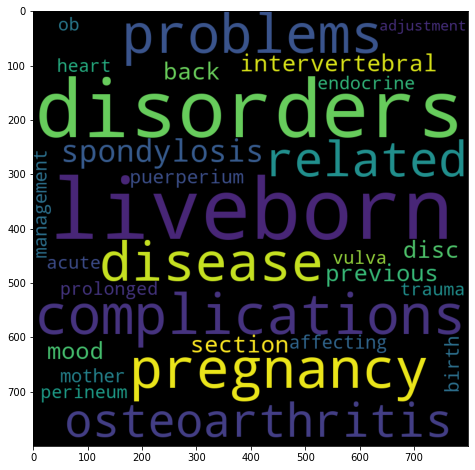

In [0]:
#Minor
df['CCS Diagnosis Description'] = df['CCS Diagnosis Description'].astype('str', errors = 'ignore')
df['CCS Diagnosis Description'] = df['CCS Diagnosis Description'].apply(lambda x: x.lower())
minor_df = df[['CCS Diagnosis Description']][df['APR Severity of Illness Description']=='Minor']
minor_df = minor_df[['CCS Diagnosis Description']][0:40000]

#lets create a function for this
def generate_cloud(type_df):
  list_of_titles = []
  from nltk.tokenize import RegexpTokenizer
  tokenizer = RegexpTokenizer(r'\w+')
  type_df['Tokens'] = type_df['CCS Diagnosis Description'].apply(lambda x: tokenizer.tokenize(x))
  list_of_tokens = type_df['Tokens'].tolist()
  type_words = []
  for sublist in list_of_tokens:
      for item in sublist:
          type_words.append(item)

  for word in list(type_words):
    if word in stop_words:
        type_words.remove(word)

  Counter1 = Counter(type_words)
  most_occur = Counter1.most_common(30) 
  diagnosis_counter = []
  for item in most_occur:
    diagnosis_counter.append(item[0])
  
  from wordcloud import WordCloud
  #Create word cloud plot
  cloud_words = ' '
  for words in diagnosis_counter: 
      cloud_words = cloud_words + words + ' '

  type_word_plot = WordCloud(width = 800, height = 800).generate(cloud_words)
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(type_word_plot)
  plt.show()

generate_cloud(minor_df)

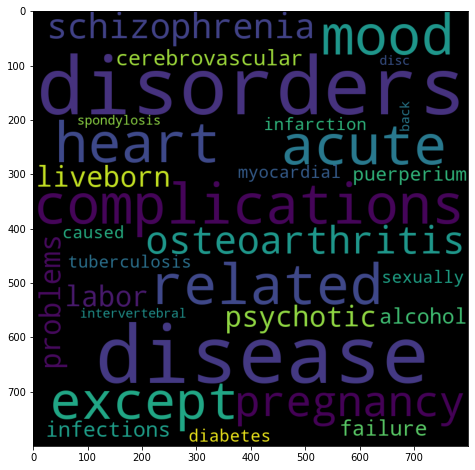

In [0]:
moderate_df = df[['CCS Diagnosis Description']][df['APR Severity of Illness Description']=='Moderate']
moderate_df = moderate_df[['CCS Diagnosis Description']][0:40000]

generate_cloud(moderate_df)

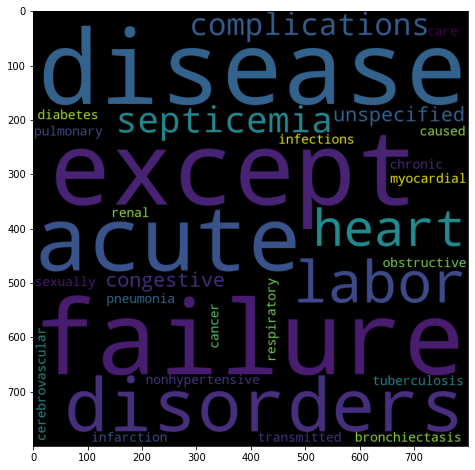

In [0]:
major_df = df[['CCS Diagnosis Description']][df['APR Severity of Illness Description']=='Major']
major_df = major_df[['CCS Diagnosis Description']][0:40000]

generate_cloud(major_df)

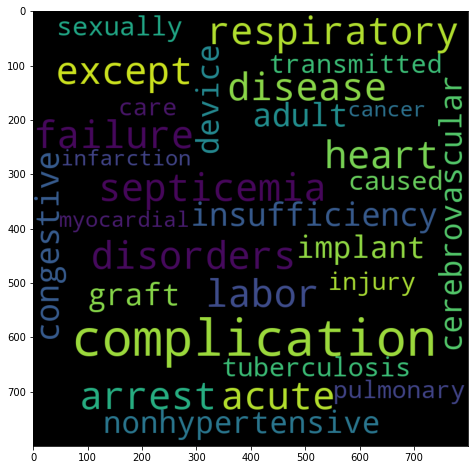

In [0]:
extreme_df = df[['CCS Diagnosis Description']][df['APR Severity of Illness Description']=='Extreme']
extreme_df = extreme_df[['CCS Diagnosis Description']][0:40000]

generate_cloud(extreme_df)

# Drop Columns

Now, in preparation for the modeling component of this project and following the data visualization section where I used some of these columns, I will now drop all the columns that won't help our model predict length of stay. In this section, I end up dropping the following columns:


*   Zip Code
*   Facility Name
*   CCS Diagnosis Description
*   CCS Procedure Description
*   APR DRG Description
*   APR MDC Description
*   Discharge Year
*   Operating Certificate Number
*   Ethnicity
*   Hospital County
*   Birth Weight
*   APR Severity of Illness Description
*   Attending Provider License Number
*   Patient Disposition




Most of these columns have corresponding columns with numeric values which I use instead in order to prevent the need for one-hot encoding columns with string values, which would dramatically increase the dimensionality of the dataset. I drop these types of columns after comparing them with the length of their corresponding "code" columns to ensure they have the same number of distinct columns and thus contain the same information.


Although there are a few other columns that might not be strong predictors, such as attending provider license number, I decide to keep them after noticing slight decreases in model accuracy when the columns are dropped










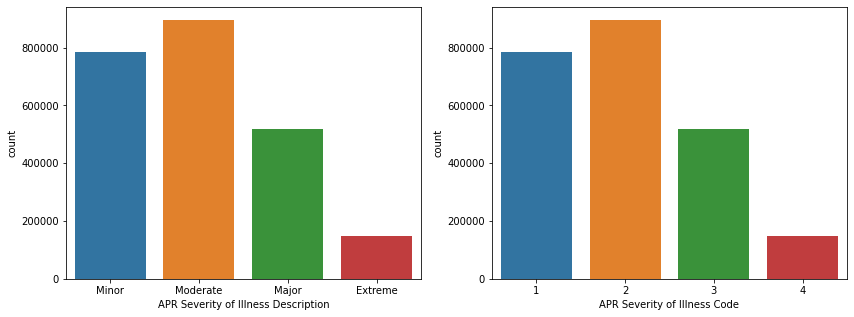

In [16]:
#Finally, lets drop the columns the rest of the columns we won't need for the modeling portion
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,2, figsize=(14,5))
sns.countplot(df['APR Severity of Illness Description'], ax=ax[0])
sns.countplot(df['APR Severity of Illness Code'], ax=ax[1])
fig.show()

df = df.drop(['APR Severity of Illness Description'], axis=1)  #after confirming the illness code column encodes the same information


In [17]:
num_county = df['Hospital County'].unique().tolist()
num_zip = df['Zip Code - 3 digits'].unique().tolist()
print("Number of Hospital County's:",len(num_county))
print("Number of Zipcodes:",len(num_zip))
#Below, we can see hospital county and zipcode do not encode same info.

num_facilities = df['Facility Id'].unique().tolist()
num_facname = df['Facility Name'].unique().tolist()
print("Number of Facility Ids:",len(num_facilities))
print("Number of Facility Names:",len(num_facname))
#We can see that these most likely encode the same info even though they are on off, so I will drop the names column

num_diag_code = df['CCS Diagnosis Code'].unique().tolist()
num_diag_desc = df['CCS Diagnosis Description'].unique().tolist()
print("Number of Diagnosis Codes:",len(num_diag_code))
print("Number of Diagnosis Descriptions:",len(num_diag_desc))
#Diagnosis Codes and Descriptions encode the same info so we will drop the descriptions. 

print("Types of Procedure Descriptions:",df['CCS Procedure Description'].unique().tolist())
#I want to see a list of the possible descriptions since many of them say NO PROC. Below is the output
#Lets verify the procedure code encodes the same info and then drop this column
num_proc_code = df['CCS Procedure Code'].unique().tolist()
num_proc_desc = df['CCS Procedure Description'].unique().tolist()
print("Number of Procedure Codes:",len(num_proc_code))
print("Number of Procedure Descriptions:",len(num_proc_desc))
#They do contain the same information, so lets drop the descriptions

num_drg_code = df['APR DRG Code'].unique().tolist()
num_drg_desc = df['APR DRG Description'].unique().tolist()
print("Number of DRG Codes:",len(num_drg_code))
print("Number of DRG Descriptions:",len(num_drg_desc))
#Same number of unique values, so drop descriptions

num_mdc_code = df['APR MDC Code'].unique().tolist()
num_mdc_desc = df['APR MDC Description'].unique().tolist()
print("Number of MDC Codes:",len(num_mdc_code))
print("Number of MDC Descriptions:",len(num_mdc_desc))
#Same number of unique values, so drop descriptions

print("Number of Attending Provider License Numbers:",len(df['Attending Provider License Number'].unique().tolist()))
#This person is responsible for the overall care of the inpatient. Thus, they might play a large role in how long that person stays
#so we will keep this column since there are 27,085 different attending providers

#Run these once you have compiled all of them!
df = df.drop(['Zip Code - 3 digits'], axis=1) #use average income as a feature instead
df = df.drop(['Facility Name'], axis=1)
df = df.drop(['CCS Diagnosis Description'], axis=1)
df = df.drop(['CCS Procedure Description'], axis=1)
df = df.drop(['APR DRG Description'], axis=1)
df = df.drop(['APR MDC Description'], axis=1)
df = df.drop(['Discharge Year'], axis=1)    #since these are all 2015 since the dataset is from 2015 inpatient records
df = df.drop(['Operating Certificate Number'], axis=1)  #drop this column since it should not be a predictor for inpatient length of stay
df = df.drop(['Ethnicity'], axis=1) #contains less information than and is contained within the Race column, so let's drop
df = df.drop(['Hospital County'], axis=1) #lets drop hospital county column for computational efficiency
df = df.drop(['Birth Weight'], axis=1) #Now we will drop birth weight, which we looked at up above
df = df.drop(['Attending Provider License Number'], axis=1) #to enable generalization of model to any attending providers
df = df.drop(['Patient Disposition'], axis=1) #data leakage feature

Number of Hospital County's: 57
Number of Zipcodes: 50
Number of Facility Ids: 213
Number of Facility Names: 214
Number of Diagnosis Codes: 263
Number of Diagnosis Descriptions: 263
Types of Procedure Descriptions: ['NO PROC', 'RESP INTUB/MECH VENTIL', 'OT DX PRC (INTERVW,EVAL', 'TRACTN, SPLNT, OT WOUND', 'OTHER THERAPEUTIC PRCS', 'OT PRCS TO ASSIST DELIV', 'CESAREAN SECTION', 'ELECTROGR CARDIAC MONIT', 'BIOPSY OF LIVER', 'BLOOD TRANSFUSION', 'REPAIR CUR OBS LACERATN', 'PSYCHO/PSYCHI EVAL/THER', 'SUTURE SKIN/SUBCUT TISS', 'FETAL MONITORING', 'COLONOSCOPY AND BIOPSY', 'OT NON-OR THER PRC NOSE', 'DEBRIDE WOUND,INF,BURN', 'UP GASTRO ENDOSC/BIOPSY', 'CT SCAN CHEST', 'HEMORRHOID PRCS', 'DX ULTRASOUND HEART', 'EPISIOTOMY', 'OT NON-OR THER PRC; FEM', 'PERIPH VASCULAR BYPASS', 'DIAGNOSTIC SPINAL TAP', 'OTHER RESP THERAPY', 'SKIN GRAFT', 'APPENDECTOMY', 'CT SCAN ABDOMEN', 'MAG RESONANCE IMAGING', 'OTHER BOWEL DX PRCS', 'ART RUPT MEMB ASSIS DLV', 'LAMINECTOMY; EXC IV DSC', 'FORCEP;VAC;BREACH DEL

# Feature Encoding

Now we are ready to format our dataframe for modeling. However, for the data cleaning process, I converted a few columns that represent categorical features into numerical values to facilitate some processes. Now, these must be converted back to categorical columns. 

In [18]:
df.dtypes

Health Service Area                  object
Facility Id                         float64
Age Group                            object
Gender                               object
Race                                 object
Length of Stay                        int64
Type of Admission                    object
CCS Diagnosis Code                    int64
CCS Procedure Code                    int64
APR DRG Code                          int64
APR MDC Code                          int64
APR Severity of Illness Code          int64
APR Risk of Mortality                object
APR Medical Surgical Description     object
Payment Typology 1                   object
Abortion Edit Indicator              object
Emergency Department Indicator       object
Total Charges                       float64
Total Costs                         float64
AvgIncome                           float64
dtype: object

In [23]:
mort_string_index = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_string_index = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}

df['Age Group'] = df['Age Group'].apply(lambda x: age_string_index[x])
df['APR Risk of Mortality'] = df['APR Risk of Mortality'].apply(lambda x: mort_string_index[x])
display(df)

Health Service Area  Facility Id  ...  Total Costs AvgIncome
0                Western NY         66.0  ...      4561.28  42056.32
1                Western NY         66.0  ...      6933.94  42056.32
2                Western NY         66.0  ...      7154.85  42056.32
3                Western NY         66.0  ...      4584.11  42056.32
4                Western NY        103.0  ...      4361.74  42056.32
...                     ...          ...  ...          ...       ...
2342216         Long Island        943.0  ...      6637.09  96822.77
2342217         Long Island        943.0  ...      3236.18  96822.77
2342218         Long Island        943.0  ...      1862.39  78134.58
2342219         Long Island        943.0  ...      2744.13  96822.77
2342220         Long Island        943.0  ...      2128.89  96822.77

[2342221 rows x 20 columns]

**One-hot encoding of all applicable columns is performed**

In [24]:
encoded_df = pd.get_dummies(df)
display(encoded_df)

Facility Id  ...  Emergency Department Indicator_Y
0               66.0  ...                                 1
1               66.0  ...                                 1
2               66.0  ...                                 1
3               66.0  ...                                 1
4              103.0  ...                                 1
...              ...  ...                               ...
2342216        943.0  ...                                 1
2342217        943.0  ...                                 1
2342218        943.0  ...                                 0
2342219        943.0  ...                                 1
2342220        943.0  ...                                 1

[2342221 rows x 48 columns]

In [0]:
encoded_df['Facility Id'] = encoded_df['Facility Id'].astype('category')
encoded_df['CCS Diagnosis Code'] = encoded_df['CCS Diagnosis Code'].astype('category')
encoded_df['CCS Procedure Code'] = encoded_df['CCS Procedure Code'].astype('category')
encoded_df['APR DRG Code'] = encoded_df['APR DRG Code'].astype('category')
encoded_df['APR MDC Code'] = encoded_df['APR MDC Code'].astype('category')
encoded_df['APR Severity of Illness Code'] = encoded_df['APR Severity of Illness Code'].astype('category')
#encoded_df['Attending Provider License Number'] = encoded_df['Attending Provider License Number'].astype('category')

Let's make the correlation matrix one more time to assess for correlation between our categorical variables. Here we can see some patches of strong positive and negative correlations in our data. This motivates the use of dimensionality reduction of correlated variables later on

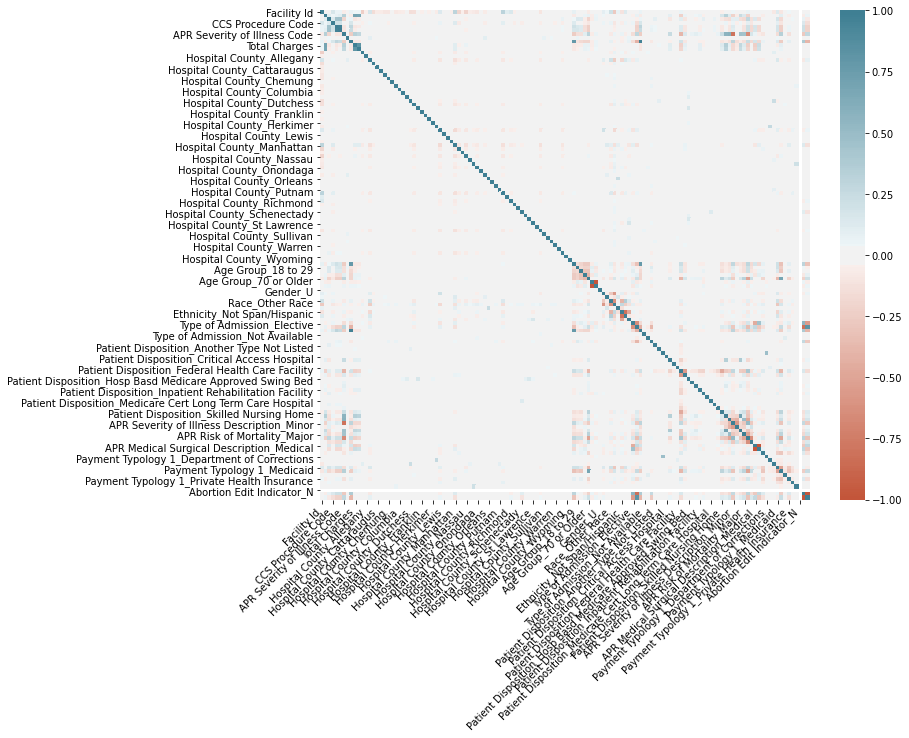

In [0]:
f, ax = plt.subplots(figsize=(11, 9))
corr = encoded_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Preliminary Modeling




Here, I prepare my data for predictive modeling using machine learning methods. This preliminary process conists of two main steps:


*   First, the the training data is separated from the labels by dropping the label column and dropping columns that would not be present at the time of length of stay prediction in a real-world scenario (such as total charges and total costs). This effectively eliminates any data leakage from occuring
*   Then, the data is split into train and test sets for use in the remainder of the project



In [0]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop(['Length of Stay','Total Charges','Total Costs'], axis=1) #remove data leakage features
y = encoded_df[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

For our first model, let's try a simple linear regression model to predict length of stay. This means treating length of stay as a somewhat continous variable ranging from interger values from 1 to 120

# Linear Regression

Below, I initialize, train, and test a linear regression model on the data. I output model mean square error, in addition to an accuracy score by rounding the results of the prediction ouputs. This allows for easier comparison with classification models tested later on. 

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

53.66900627140297
53.87687642960796
Test accuracy: 0.1351564823735852
Train accuracy: 0.1351812749076883


We can see the linear regression model does not perform particularly well. These results motivate me to move forward with machine learning multi-class classification models as opposed to regression models

# PCA

Next, I perform principal component analysis (PCA) to see if this can improve future model results and efficiency by scaling and reducing the dimensionality of the data. As is shown below, I am able to eliminate ~20 columns from the dataframe while retaining 95% explained variance in the data.

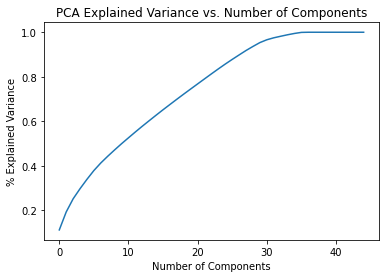

In [29]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca1 = PCA()
pca1.fit(x_train)
explained_variance_ratio = pca1.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()


In [30]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca2 = PCA(n_components=component_95)
x_train = pca2.fit_transform(x_train)
x_test = pca2.transform(x_test)

29


# Which are the most important features?

Below, I briefly explore the relative feature importance in the dataset using the pca results performed above. This is done for as it will help answer questions such as: which factors actually influence how long patients stay in a hospital? This information could prove useful for hospitals as it can highlight important factors to pay attention to

I calculate the features of greatest importance based off their maximum contribution along the top two principal components of the dataset

In [0]:
pc_df = pd.DataFrame(pca2.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)

Facility Id  ...  Emergency Department Indicator_Y
0    -0.063361  ...                          0.273058

[1 rows x 72 columns]

In [0]:
new_top_pc = top_pc.abs()
features = []
for i in range(0,10):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])
print(features)

[['APR Risk of Mortality_Minor'], ['Payment Typology 1_Medicare'], ['Emergency Department Indicator_N'], ['Emergency Department Indicator_Y'], ['Type of Admission_Emergency'], ['Age Group_70 or Older'], ['APR Severity of Illness Code'], ['Patient Disposition_Home or Self Care'], ['Type of Admission_Newborn'], ['Age Group_0 to 17']]


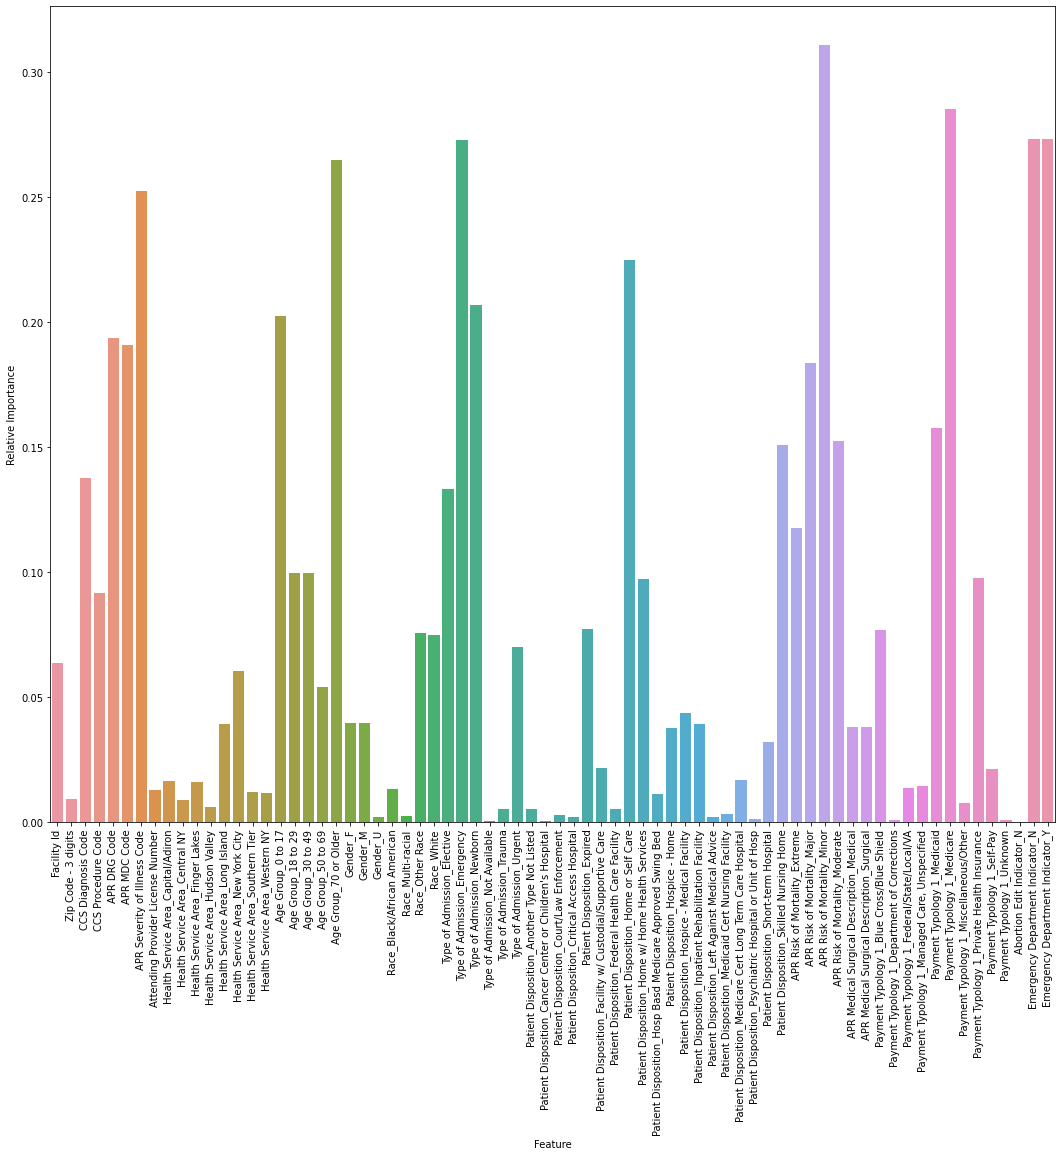

In [0]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(18,15))
sns.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

From this figure, we can see that features such as the illness code, age group, type of admission, risk of mortality, payment typology and emergency department indicator play a large role in explaining the variance in the dataset. This supports the findings suggested by the figures in the data visualization section.

# Decision Tree

For our next model, let's train a decision tree classifier. Decision trees are one of the most common models for classification problems, so let's see how one performs on this data

In [0]:
#Decision Tree - on non-pca data
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))


Train Accuracy: 0.9593499207711366
Test Accuracy: 0.25371619842685084


Without parameter optimization, we can see that we have definitely overfit. This is evident in the extremely high training accuracy, but with a much lower test accuracy. However, we are performing better than the linear regression model. Let's see if we can do better by setting some model hyperparameters

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=150)
dtree.fit(x_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.2970204092088458
Test Accuracy: 0.2967621931868154


By setting the max depth and max leaf nodes parameter, I have successfully prevented overfitting of the decision tree. Below is a visualization of the tree, which allows us to asses model complexity visually by looking at the depth of the tree and the number of leaf nodes present

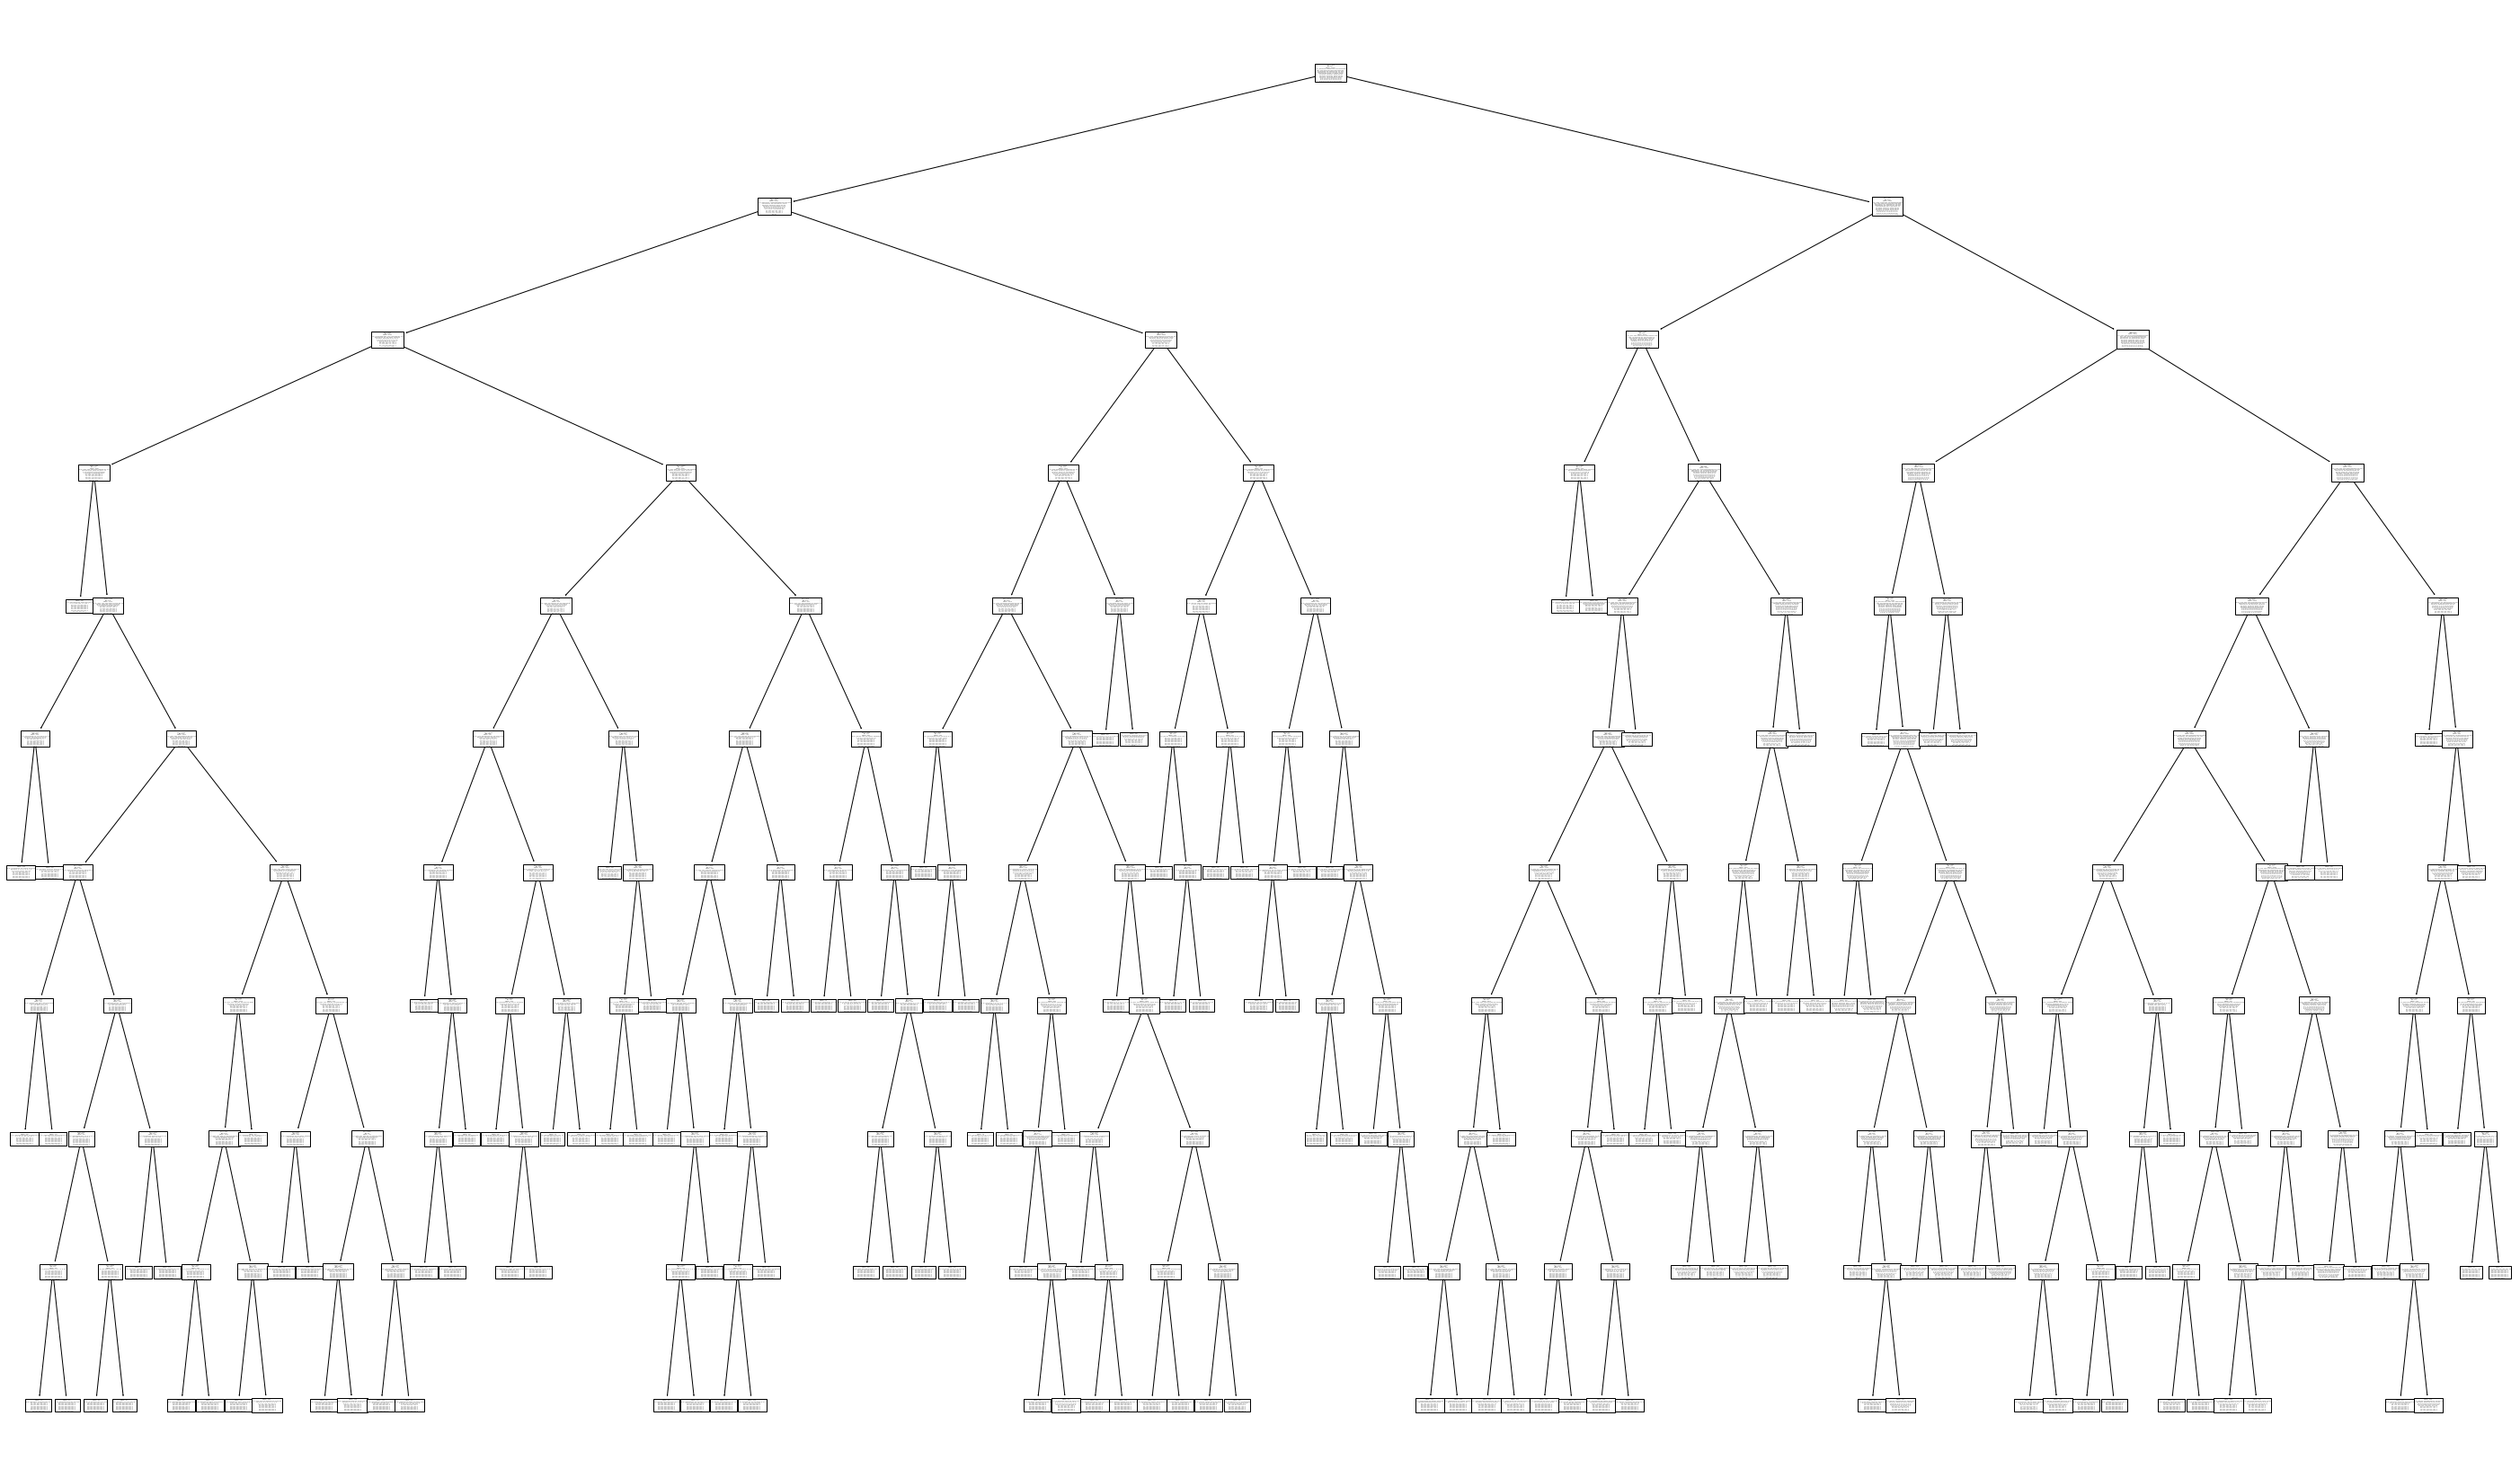

In [0]:
from sklearn.tree import plot_tree
f, ax = plt.subplots(figsize=(50, 30))
plot_tree(dtree)
plt.show()

To confirm the use of classification for the remainder of the modeling, I test out a decision tree regressor. We can see that it performs worse than its classification counterpart

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

clf=DecisionTreeRegressor(max_depth=10, max_leaf_nodes=150)
clf.fit(x_train,y_train)
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

mse_test = mean_squared_error(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
y_round_pred = np.ndarray.round(test_pred)
y_round_train_pred = np.ndarray.round(train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)


42.45874966115105
42.27440471142031
Test accuracy: 0.20811565079902714
Train accuracy: 0.20819015415167783


We could keep tuning parameters with the decision tree classifier to get better results, but we will get better performance using a random forest - an ensemble of decision trees. However, before attempting to implement another model, I decide to look at another way of increasing model performance. 

After observing that decision tree classification seems to perform better than the regression, I am inclined to continue with classification. Along these lines, I will create bins of length of stay to construct a new categorical predictor column. Not only do these bins make sense given the fact that there is not a large difference between staying at a hospital for 57 days vs. 58 days, for example, but this will also increase the prediction accuracy of the model I build. This is evident in that the model can now predict a given patient will stay bewteen a given range of days, instead of having to predict an exact number of days. Below, I will perform this construction of new categories

# Label/Predictor Construction

Summary of findings from this section:




*   From the exploratory data analysis section of this project, I discovered the huge class imbalance present in the dataset given that most of the length of stays are clustered in the 1-5 day range
*   Class imbalance can have significant negative effects of model performance. For example, model accuracy can be misleadinly high if the model simply only predicts the classes that appear alot, in the process disregarding features that may point to that data row belonging to another, less common class. I find that this is the case with my models. 
*   In this section, I attempt to deal with this class imbalance in a few different ways after observing the affects of this class imbalance on model performance. These effects are dicussed in this section.
*   After trying numerous different labeling schemes that involves length 
of stay bins of different sizes, and different numbers of length of stay bins that allowed for more/less specificty in predictions, I came to an optimal binning format that had a high accuracy score for most models trained on it, while not losing large amounts of specifity in predictions
*   The bins I decided to use for my final models are listed here:
[0-3, 3-6, 6-9, 9-13, 13-20, 20-50, 50-120+] where all units are in days
*   This bin format results in a baseline accuracy of 1/7, or ~14.3% accuracy if the model were to guess randomly






Below shows some snippets of the iterative process I went through in order to determine this optimal bin format

As I create these categories, I will keep in mind that I want to create a somewhat even distribution of the number of data rows
within each bin. The below label construction was made with the fact that small differences in length of stay matter less for patients who have long lengths of stay than for patients who are only staying 1 or 2 days. In other words, the difference between staying at a hospital
for 1 day versus 2 days is more significant than staying 119 days vs. 120 days

In [0]:
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,120]
encoded_df['stay_bin']=pd.cut(x = encoded_df['Length of Stay'],
                        bins = bins)
encoded_df['stay_label']=pd.cut(x = encoded_df['Length of Stay'],
                        bins = bins,
                        labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(encoded_df)


Facility Id  Zip Code - 3 digits  ...  stay_bin  stay_label
0               66.0                  147  ...   (4 - 5]           4
1               66.0                  147  ...   (7 - 8]           7
2               66.0                  147  ...   (7 - 8]           7
3               66.0                  147  ...   (3 - 4]           3
4              103.0                  147  ...   (2 - 3]           2
...              ...                  ...  ...       ...         ...
2346755        943.0                  117  ...   (1 - 2]           1
2346756        943.0                  117  ...   (0 - 1]           0
2346757        943.0                  119  ...   (1 - 2]           1
2346758        943.0                  117  ...   (0 - 1]           0
2346759        943.0                  117  ...   (0 - 1]           0

[2342221 rows x 77 columns]

I visualize my new class distribution below

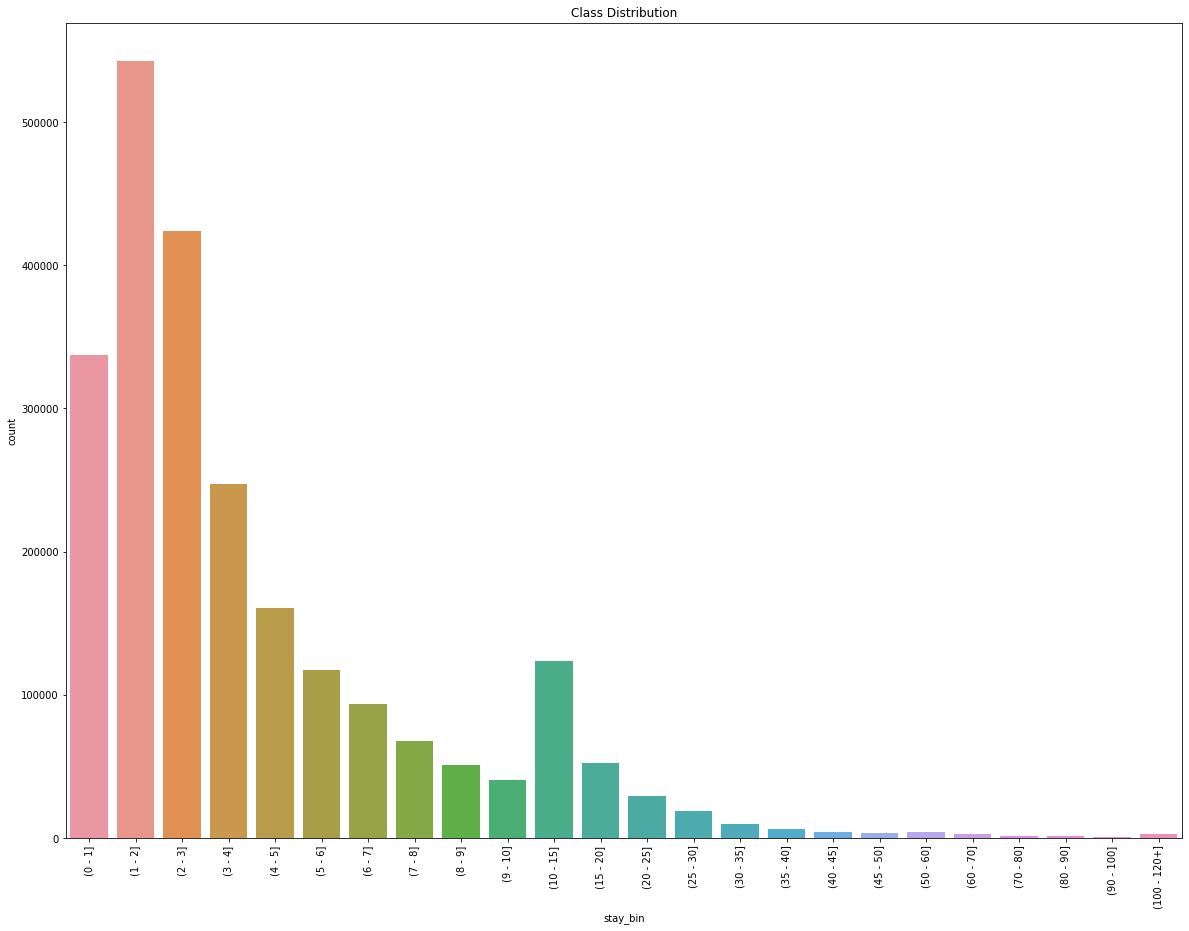

In [0]:
f, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x='stay_bin', data = encoded_df)
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.show()

Let's run another decision tree classifier and see how much our classification improves now with these bins

In [0]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = encoded_df.drop(['Length of Stay','Total Charges','Total Costs','stay_bin','stay_label'], axis=1)
new_y = encoded_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=50) #50 components, as found above
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [0]:
#perform decision tree classification
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=300)
dtree.fit(x_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.2945044810966885
Test Accuracy: 0.29313600894876235


We are getting a similar accuracy as with our decision tree above. This caused me to raise an eyebrow and hypothesize that that there is an issue with class imbalancing, as the model may just be predicting shorter lengths of stay in both models since there are the most instances of these classes. Let's plot a confusion matrix to see if we can confirm this

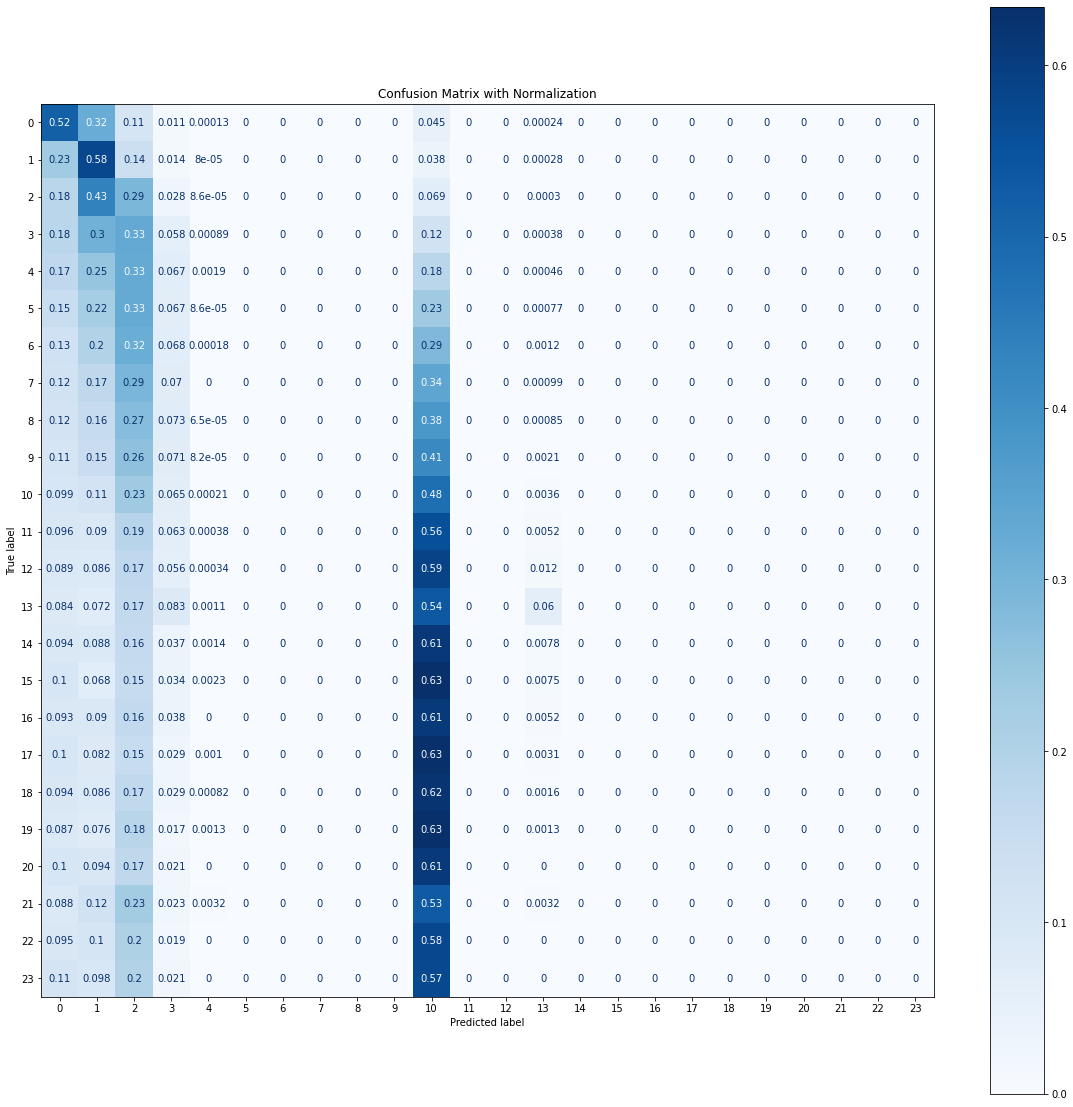

In [0]:
#Create confusion matrix
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

We can see the dramatic effects of the class imbalance on this model from this confusion matrix. As we can see, the model is mostly predicting labels 0-4. Then, it almost never predicts any values between 5 and 9 or 11 and 23. Instead, it classifies the remainder of the predictions in the 10 label. An idea for the reason behind this is that there is a spike in class count in this bin as seen from the class distribution plot above. Thus, the model predicts rows with features that correspond to longer lenghts of stay entirely in this bin as the most of these instances correspond to this label. This result illustrates the danger of class imbalance in a modeling problem

Next, I explore two ways of dealing with class imbalance: undersampling and assinging class weights that penalize overpredicting the most common label

# Undersampling Techniques Following Label Construction

In [0]:
#We can see that we have major class imbalance issues. I deal with that here
from collections import Counter 
counts = y_train['stay_label'].value_counts().tolist()
print(counts)
#df_class_0_under = df_class_0.sample(count_class_1)
#df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
resample_dict = {0:112307, 1:112307, 2:112307, 3:112307} #resample the first four classes to have the same number of instances as the (10-15] bucket
rus = RandomUnderSampler(random_state=0, sampling_strategy=resample_dict)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[379575, 296843, 236080, 172775, 112398, 86750, 82282, 65176, 47601, 36979, 35911, 28057, 20577, 13350, 6785, 4194, 3161, 2803, 2233, 1929, 1744, 1099, 739, 513]
[[     0      1      2      3      4      5      6      7      8      9
      10     11     12     13     14     15     16     17     18     19
      20     21     22     23]
 [112307 112307 112307 112307 112398  82282  65176  47601  35911  28057
   86750  36979  20577  13350   6785   4194   3161   2233   2803   1744
    1099    739    513   1929]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


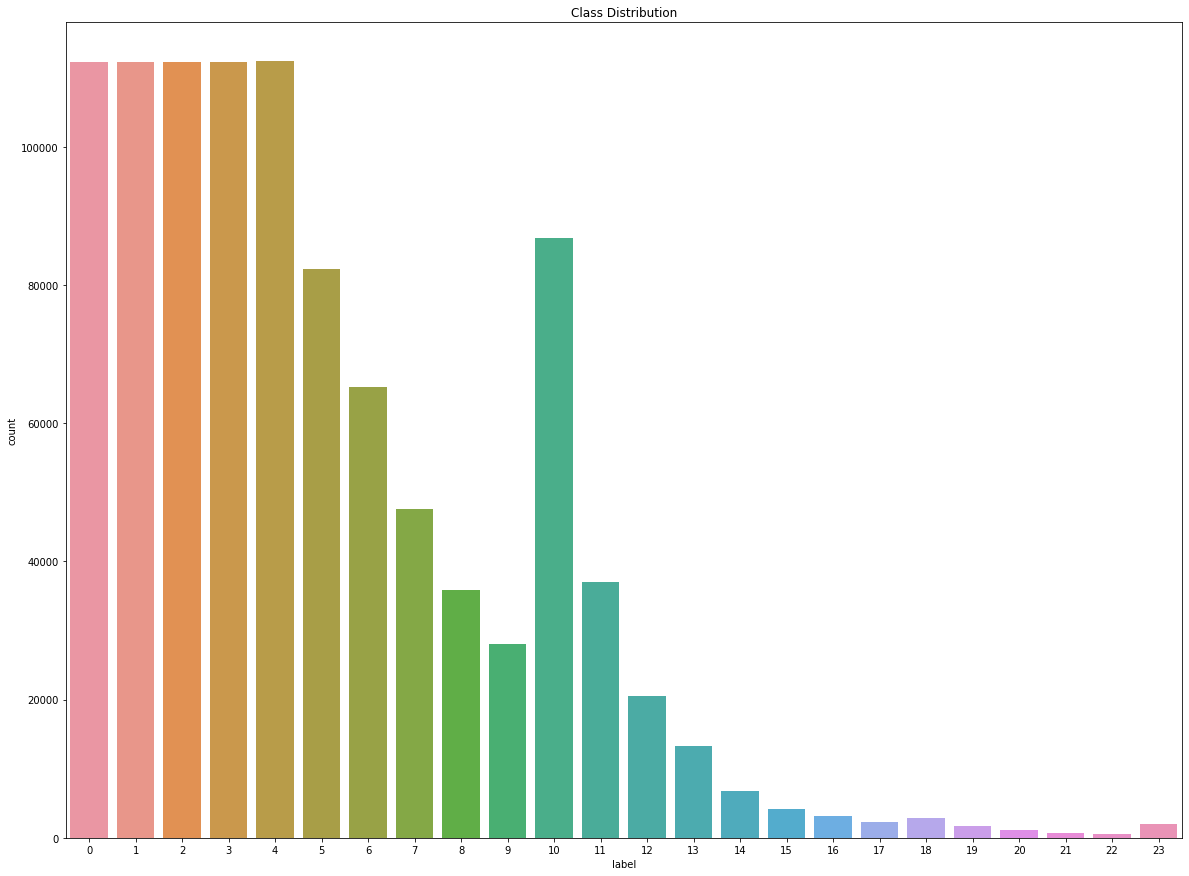

In [0]:
#Plot the new class distribution in the train set

y_resampled_df = pd.DataFrame(data=y_resampled, columns=['label'])

f, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x='label', data = y_resampled_df)
plt.title('Class Distribution')
plt.show()

In [0]:
#Now lets run the decision tree and confusion matrix again
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=300)
dtree.fit(x_resampled,y_resampled)

from sklearn import metrics
train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))


Train Accuracy: 0.26525140373540607
Test Accuracy: 0.264348546324219


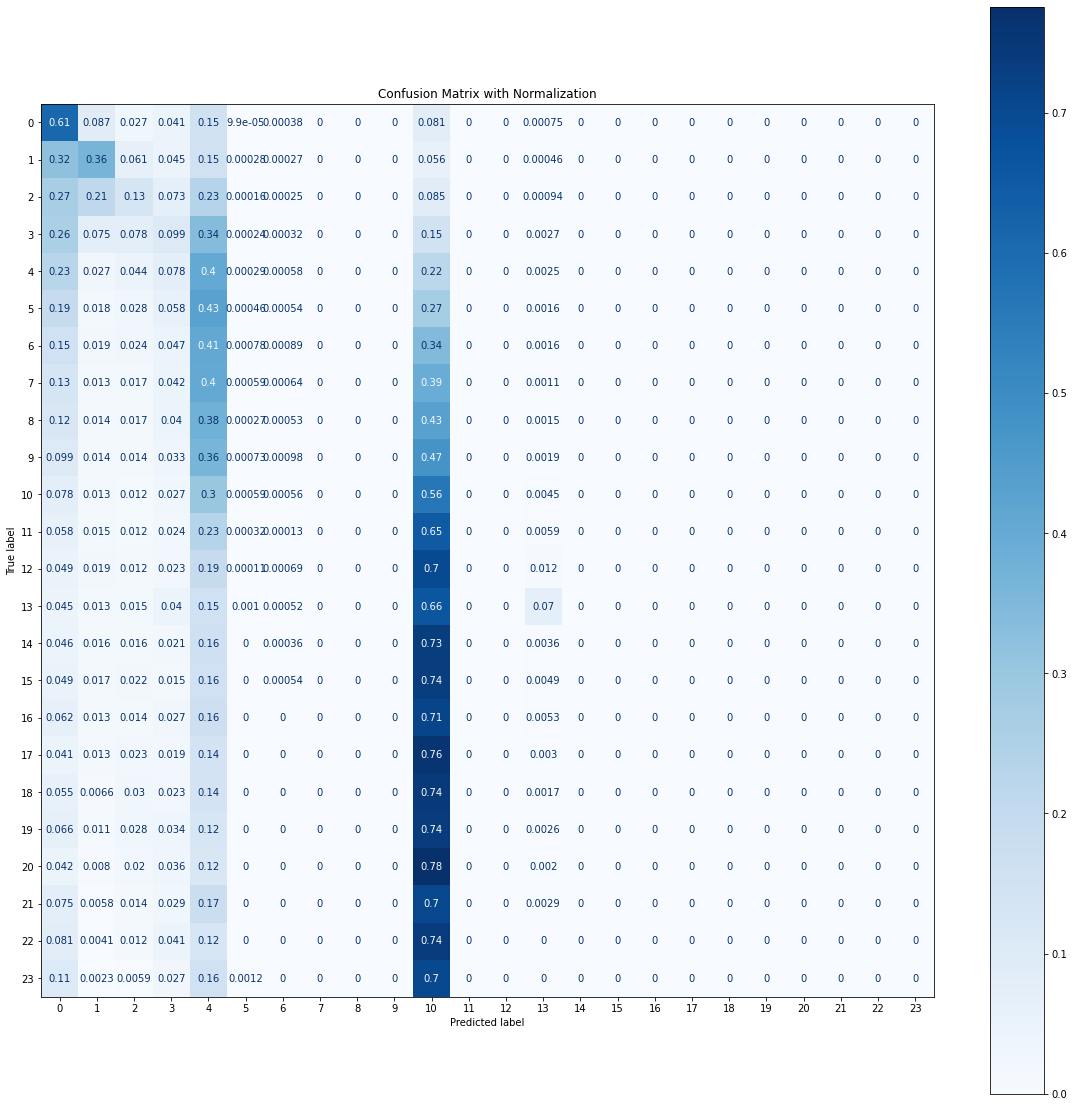

In [0]:
#Create confusion matrix
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

We are still over-predicting in certain bins. I undersample the originial training data even further until I reach a distribution that causes the trend visualized in the confusion matrix above to disappear. 

In [0]:
#lets downsample all the way to one of our smallest bins (the last bin that contains lenght of stays 100-120+)
from collections import Counter 
counts = y_train['stay_label'].value_counts().tolist()
print(counts)

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
resample_dict = {0:1000, 1:1000, 2:1000, 3:1000, 4:1000, 5:1000, 6:1000, 7:1000, 8:1000, 9:1000, 10:1000, 11:1000, 12:1000, 13:1000,
                 14:1000, 15:1000, 16:1000, 17:1000, 18:1000, 19:1000, 20:1000, 23:1000 } #lets take everything down to the 14th bucket size = 6785
rus = RandomUnderSampler(random_state=0, sampling_strategy=resample_dict)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))


[379561, 296399, 236222, 173446, 112538, 86910, 82048, 65177, 47651, 36880, 35681, 28116, 20371, 13363, 6710, 4242, 3127, 2776, 2283, 1948, 1733, 1093, 755, 524]


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23]
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
  1000 1000 1000 1000 1000 1000 1000  755  524 1000]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#Now lets run the decision tree and confusion matrix again
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 30, max_leaf_nodes=500)
dtree.fit(x_resampled,y_resampled)

from sklearn import metrics
train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.1776287941720736
Test Accuracy: 0.1768234455296748


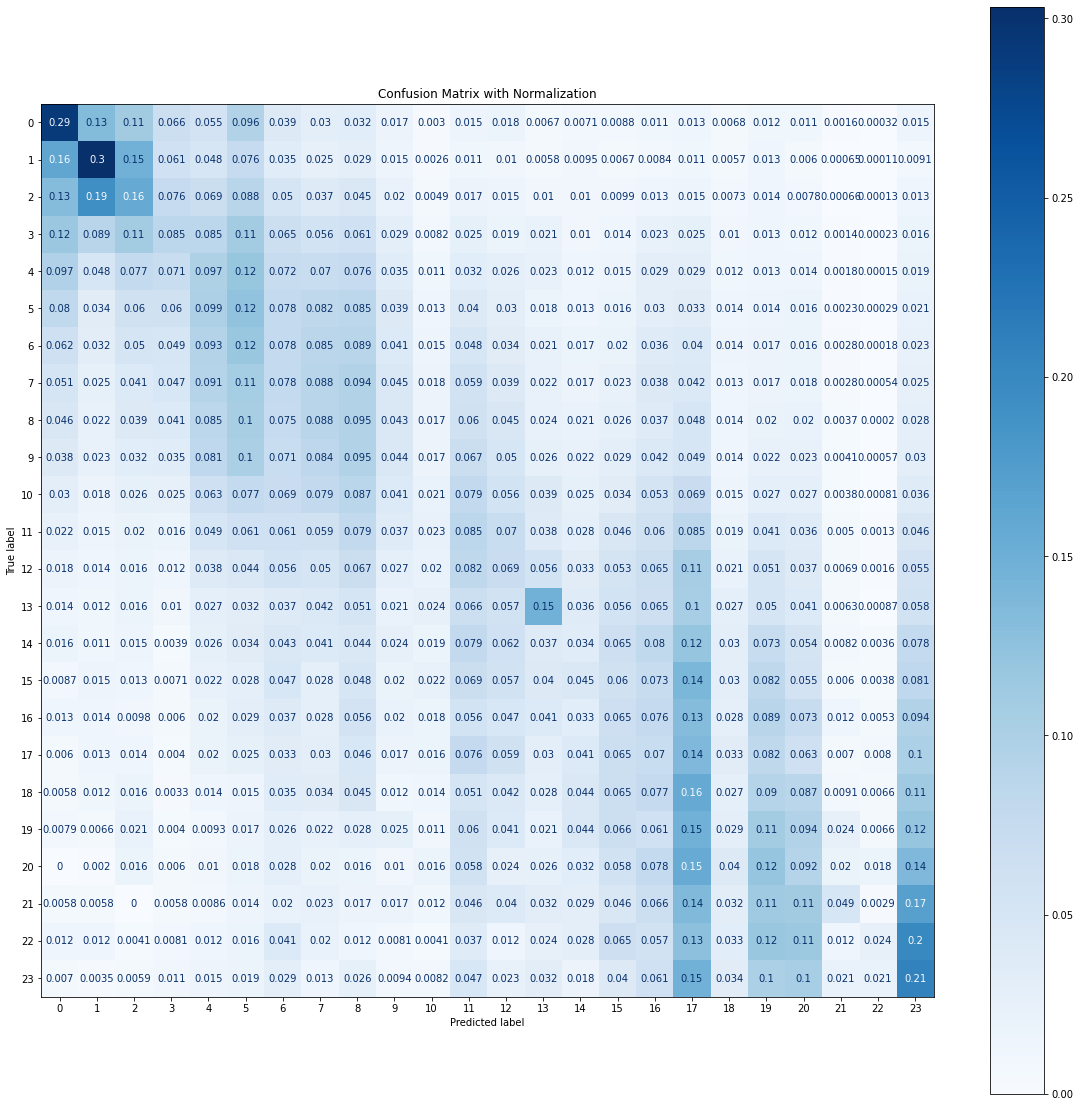

In [0]:
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

Finally, we can see that our training accuracy has gone down, but we no longer see over-prediction of any particular category bins. Thus, we have successfuly dealt with the negative effect of class imbalance on model performance. Next, I will explore the second method of dealing with the class imbalance and comapre the results between the two in order to proceed with the optimal method. The below results are on an iteration of the dataset with fewer labels than used above. While the thought process behind this is explained later, the main result of dealing with class balance is emphasized here.

In [0]:
#perform decision tree classification no undersampling with non-pca data
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=300)
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.3245266700578328
Test Accuracy: 0.32360278766471173


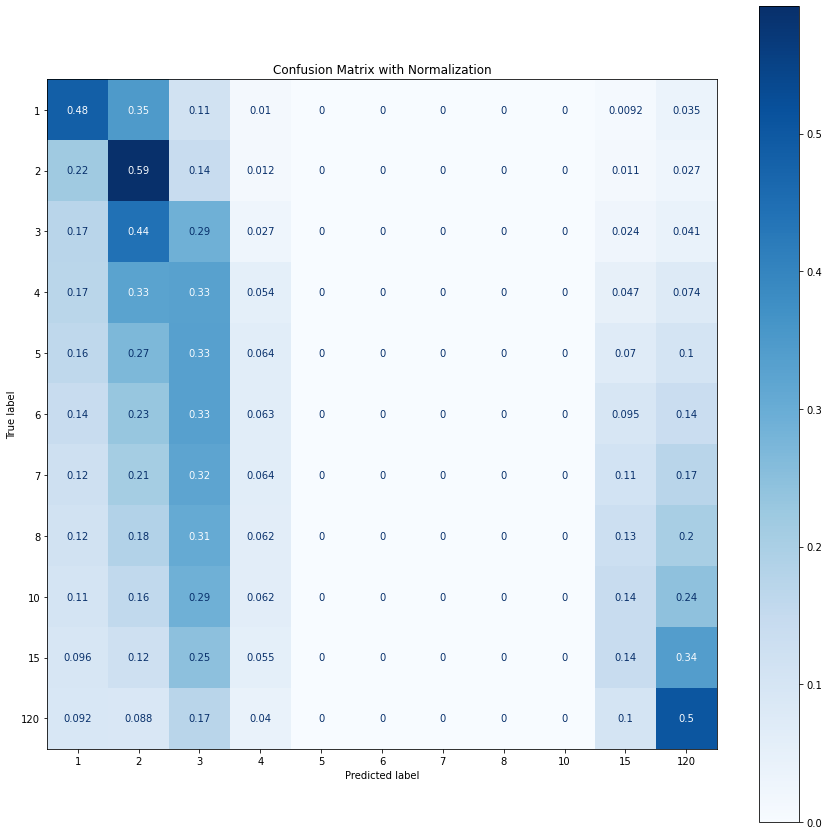

In [0]:
#Create confusion matrix
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

Here is where I implement the weights method of dealing with clas imbalance. The “balanced” mode for the class weight parameter of the decision tree uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [0]:
#perform decision tree classification with balanced class weight parameter
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 15, max_leaf_nodes=300, class_weight='balanced')
dtree.fit(x_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.2724838584151544
Test Accuracy: 0.26974370505516837


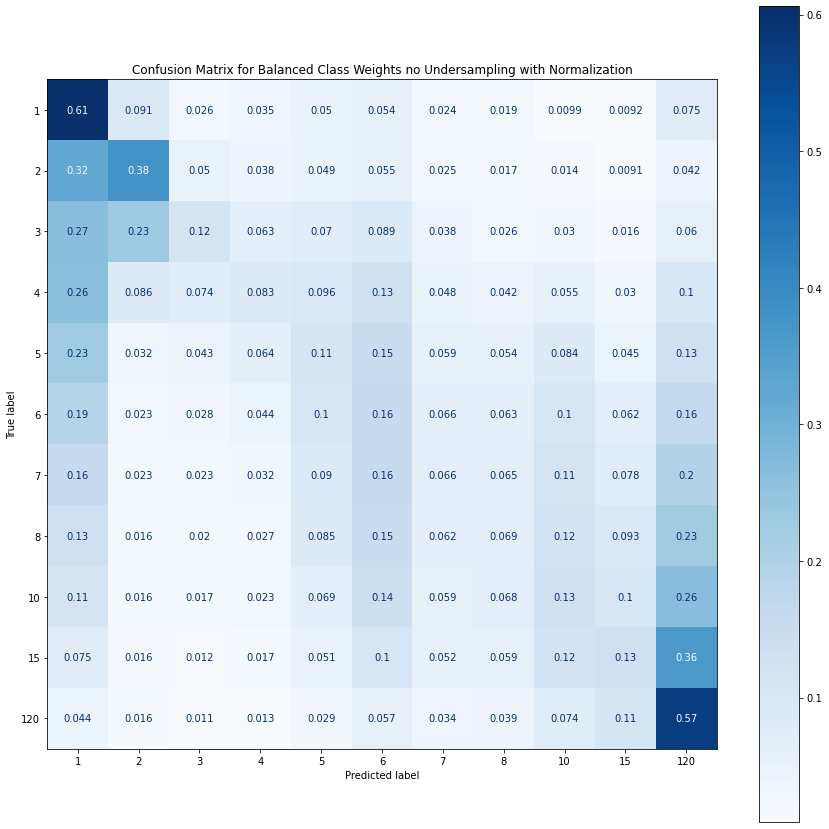

In [0]:
#confusion matrix for unbalanced classes with class_weights balanced
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix for Balanced Class Weights no Undersampling with Normalization')
plt.show()

We can see that we get similar results with class weights as with when we perform class balancing - interesting and useful to know

# Neural Network

Here, I implement a feed-forward neural network model for length of stay classification. For this model, I use the undersampled data attained previously to assess accuracy results with a different model. Ultimately, I find that the neural network did not perform particularly well, most likely due to the small size of the training set given the undersampling that has been performed. This motivates the next section of my project. 

In [0]:
#install dependencies
%%capture
!pip3 install mxnet-cu101

In [0]:
%%capture
!pip3 install --upgrade mxnet-cu101 gluoncv

In [0]:
import mxnet as mx
from gluoncv.utils import viz
from mxnet.gluon.data import DataLoader
from mxnet.gluon.data.vision import transforms
from mxnet import np
import shutil

I construct a model with three dense layers, two of which are made up of 800 and 400 units, while the final has a number of units equal to the number of class labels. This results in a total of 1207 tunable parameters as shown in the model summary depicted below

In [0]:
from mxnet import gluon, autograd, ndarray, nd
num_unique_labels = len(encoded_df['Lengh of stay'].unique().tolist())
def construct_ff_net():

    ff_net = gluon.nn.Sequential()
    with ff_net.name_scope():
      ff_net.add(gluon.nn.Dense(units=800, activation='relu'))
      ff_net.add(gluon.nn.Dense(units=400, activation='relu'))
      ff_net.add(gluon.nn.Dense(units=num_unique_labels)) #output layer

    return ff_net

ff_net  = construct_ff_net()

#ff_net.collect_params().initialize(mx.init.Normal(sigma=.1), ctx=ctx)
ctx =  mx.gpu() if mx.context.num_gpus() else mx.cpu()
criterion = gluon.loss.SoftmaxCrossEntropyLoss()
ff_net.initialize(mx.init.Xavier(), ctx=ctx)

trainer = gluon.Trainer(ff_net.collect_params(), 'adam', {'learning_rate': .001})

In [0]:
#Print the model summary:

x = mx.sym.var('data')
sym = ff_net(x)
mx.viz.print_summary(sym)

________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
data(null)                                                                  0                                           
________________________________________________________________________________________________________________________
sequential2_dense0_fwd(FullyConnected)                                      800         data                            
________________________________________________________________________________________________________________________
sequential2_dense0_relu_fwd(Activation)                                     0           sequential2_dense0_fwd          
________________________________________________________________________________________________________________________
sequential2_dense1_fwd(FullyConn

In [0]:
#Train the network

def train_network(net, x_resampled, y_resampled, criterion, trainer, metric, epochs):

    cum_training_loss=[]
    cum_training_accuracy = []

    for e in range(epochs):
      cumulative_loss = 0
      training_samples = 0
      for i in range(0,(y_resampled.shape[0])):
        data = x_resampled[i].as_in_context(ctx).reshape(-1,50)
        label = y_resampled[i].as_in_context(ctx)
        with autograd.record():
          output = net(data)
          loss = criterion(output, label)
        predictions = nd.argmax(output, axis=1)
        metric.update(preds=predictions, labels=label)
        loss.backward()
        trainer.step(data.shape[0])  #batch size of data
        cumulative_loss += nd.sum(loss).asscalar()
        training_samples += data.shape[0]
      
      train_accuracy = metric.get()[1]
      print("Epoch %s. Loss: %s, Train_acc %s" %
          (e, cumulative_loss/training_samples, train_accuracy))
      cum_training_loss.append(cumulative_loss/training_samples)
      cum_training_accuracy.append(train_accuracy)

    final_training_accuracy = train_accuracy
    final_training_loss = cumulative_loss/training_samples
    return final_training_loss, final_training_accuracy, cum_training_loss, cum_training_accuracy

epochs = 8
metric  = mx.metric.Accuracy()
x_resampled_nd = mx.nd.array(x_resampled)
y_resampled_nd = mx.nd.array(y_resampled)
ffn_training_loss, ffn_training_accuracy, cum_loss, cum_acc = train_network(ff_net, x_resampled_nd, y_resampled_nd, criterion, trainer, metric, epochs)

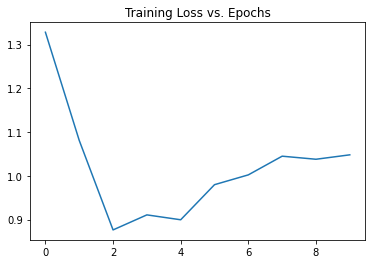

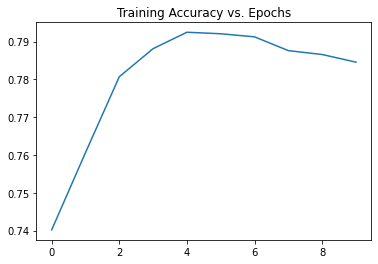

In [0]:
#Create plots
import matplotlib.pyplot as plt
plt.plot(range(epochs), cum_loss)
plt.title('Training Loss vs. Epochs')
plt.show()

plt.plot(range(epochs), cum_acc)
plt.title('Training Accuracy vs. Epochs')
plt.show()

Interestingly, training accuracy starts off extremely high compare to our other models. Let's see if this holds true when we test our network on the test set

In [0]:
def test_model(net, criterion, x_test, y_test, metric):

    cumulative_loss = 0
    training_samples = 0
    for i in range(0,(x_test.shape[0])):
      data = x_test[i].as_in_context(ctx).reshape((-1,50))
      label = y_test[i].as_in_context(ctx)
      with autograd.record():
        output = net(data)
        loss = criterion(output, label)
      predictions = nd.argmax(output, axis=1)
      metric.update(preds=predictions, labels=label)
      cumulative_loss += nd.sum(loss).asscalar()
      training_samples += data.shape[0]

    test_accuracy = metric.get()[1]
    testing_accuracy = test_accuracy
    testing_loss = cumulative_loss/training_samples
    
    return  testing_loss, testing_accuracy

In [0]:
#Test network on test set
x_test_nd = mx.nd.array(x_test)
y_test_nd = mx.nd.array(y_test)
ffn_testing_loss, ffn_testing_accuracy = test_model(ff_net, criterion, x_test_nd, y_test_nd, metric)

print("Feedforward Neural Network - the testing loss is ", str(ffn_testing_loss))
print("Feedforward Neural Network - the testing accuracy is ", str(ffn_testing_accuracy))

Feedforward Neural Network - the testing loss is  29.357241001863127
Feedforward Neural Network - the testing accuracy is  0.1954890263123257


We can see that our neural network did not perform very well, achieving an accuracy score somewhere betwen the linear regression and the decision tree model. This may be due to the fact that we are losing a lot of data after undersampling our classes, which may be contributing to subpar accuracy. This result motivated me to proceed by redefining label bins into bins with larger counts (to create more even class counts and have fewer labels overall to predict), and use the balanced class weights parameter in the scikit learn package instead of undersampling (to prevent losing a large amount of training data). This process is shown below.

# Class Balancing Pt. 2

In [27]:
#bins = [0,3,6,9,13,20,50,120]
#labels = [3,6,9,13,20,50,120]

bins = [0,5,10,20,30,50,120]
labels = [5,10,20,30,50,120]
encoded_df['stay_bin']=pd.cut(x = encoded_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
encoded_df['stay_label']=pd.cut(x = encoded_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(encoded_df)

Facility Id  Age Group  ...  stay_bin stay_label
0              66.0          4  ...   (0 - 5]          5
1              66.0          2  ...  (5 - 10]         10
2              66.0          3  ...  (5 - 10]         10
3              66.0          4  ...   (0 - 5]          5
4             103.0          4  ...   (0 - 5]          5
...             ...        ...  ...       ...        ...
2342216       943.0          5  ...   (0 - 5]          5
2342217       943.0          4  ...   (0 - 5]          5
2342218       943.0          4  ...   (0 - 5]          5
2342219       943.0          5  ...   (0 - 5]          5
2342220       943.0          3  ...   (0 - 5]          5

[2342221 rows x 50 columns]

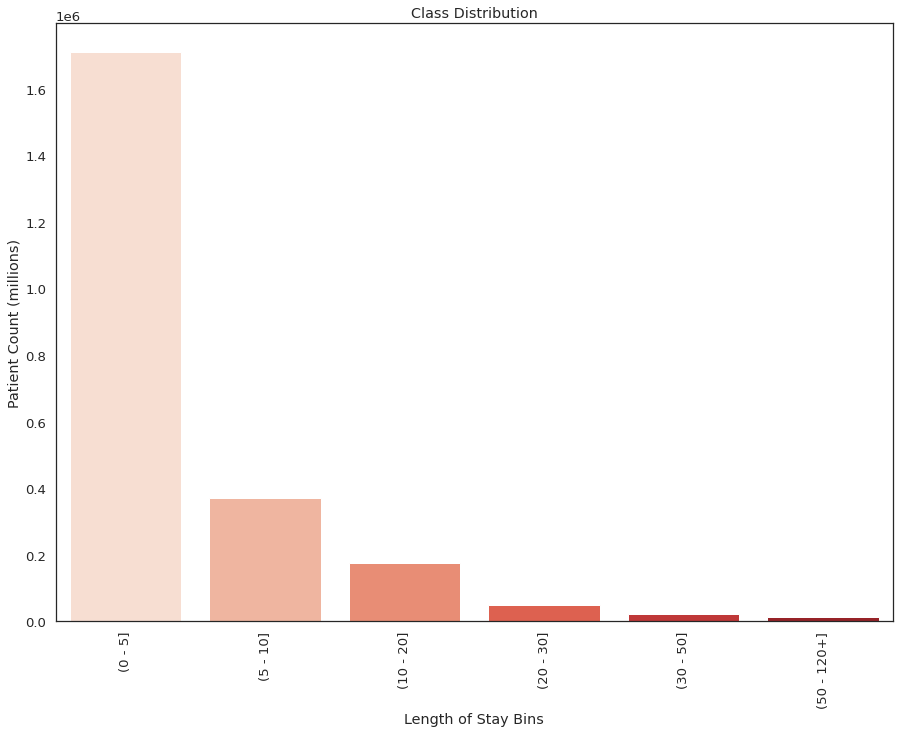

In [105]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = encoded_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

#create train and test sets
new_X = encoded_df.drop(['Length of Stay','Total Charges','Total Costs','stay_bin','stay_label'], axis=1)
new_y = encoded_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=29) #29 components, as found above
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [54]:
#logisitic regression without class balance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.7318630304255074
Train accuracy: 0.7328834548907813


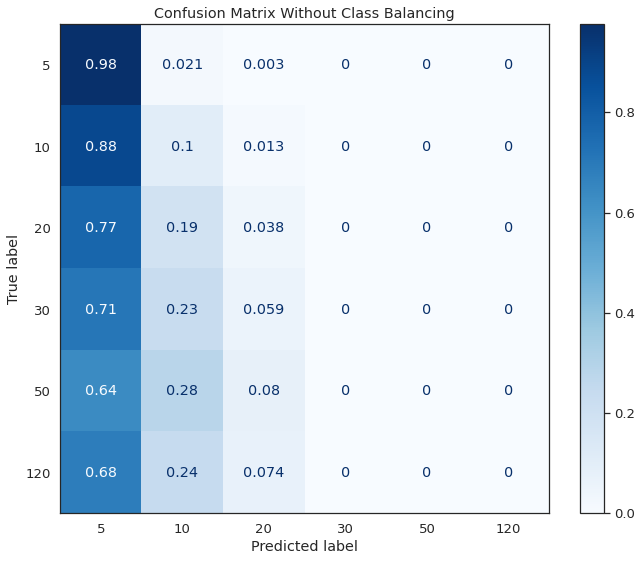

In [55]:
#Create confusion matrix for no class balancing
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix Without Class Balancing')
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           5       0.76      0.98      0.86    512864
          10       0.30      0.10      0.16    111085
          20       0.30      0.04      0.07     53169
          30       0.00      0.00      0.00     14629
          50       0.00      0.00      0.00      7039
         120       0.00      0.00      0.00      3881

    accuracy                           0.73    702667
   macro avg       0.23      0.19      0.18    702667
weighted avg       0.63      0.73      0.65    702667



In [64]:
#logistic regression - works better with standardized but no PCA performed on data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(class_weight='balanced', multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.5893744832189358
Train accuracy: 0.5897811234030718


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.88      0.70      0.78    512864
          10       0.28      0.35      0.31    111085
          20       0.18      0.15      0.17     53169
          30       0.07      0.22      0.11     14629
          50       0.04      0.12      0.06      7039
         120       0.03      0.36      0.06      3881

    accuracy                           0.59    702667
   macro avg       0.25      0.32      0.25    702667
weighted avg       0.71      0.59      0.64    702667



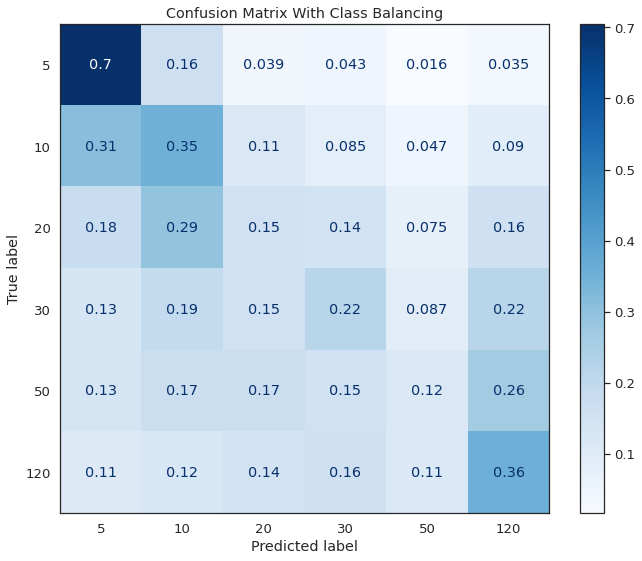

In [42]:
#Another example of importance of class balancing
#Create confusion matrix
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix With Class Balancing')
plt.show()

As we can see, the balanced class weight parameter has again prevented over-prediction in specific label values

In [43]:
#overfit tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))


Train Accuracy: 0.9475418314980781
Test Accuracy: 0.6699645778156652


Let's optimize parameters to prevent overfitting

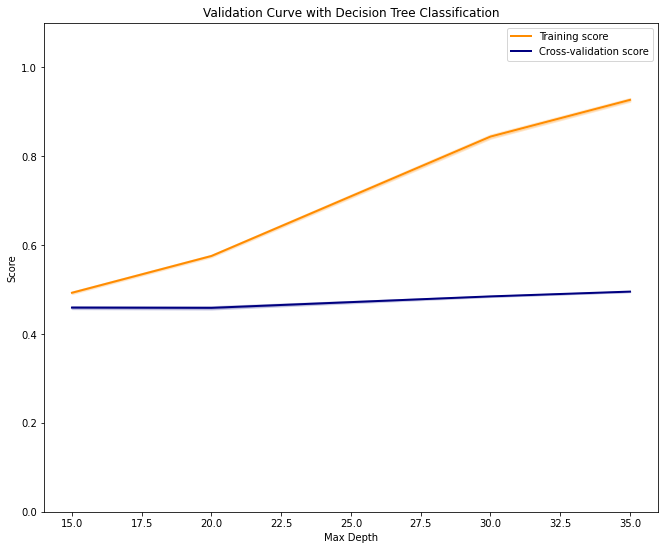

In [0]:
from sklearn.model_selection import validation_curve
param_range = [15,20,30,35,100]
train_scores, test_scores = validation_curve(dtree, x_train, y_train, param_name='max_depth', 
                                             param_range=param_range, cv=3, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(11,9))
plt.title("Validation Curve with Decision Tree Classification")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

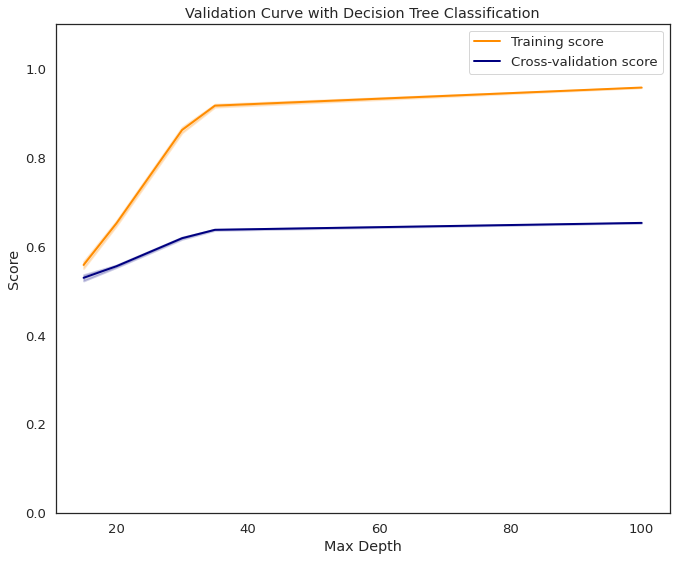

In [113]:
from sklearn.model_selection import validation_curve
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)
param_range = [15,20,30,35,100]
train_scores, test_scores = validation_curve(dtree, X_train, y_train, param_name='max_depth', 
                                             param_range=param_range, cv=3, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(11,9))
plt.title("Validation Curve with Decision Tree Classification")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Here, we can see the effect of the max depth parameter on decision tree performance. As max depth is increased, the decision tree becomes more prone to overfitting, resulting in a somewhat linear increase in training accuracy, but a constant cross-validation score throughout. Next, let's perform a grid search on this max depth parameter along with max leaf nodes in order to find the optimal combination of parameters for the model

Now I will test a random forest model on the data. With this large of a dataset, the random forest classifier is slow to run, and thus a hyperparameter optimization search is not the most feasible. Instead, let's try a randomized grid search on the decision tree classifier following the random forest model test

In [61]:
#try a randomized search on decision tree with 3-fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
search_vals = dict(max_depth=[35,50,75,100], max_leaf_nodes=[800,1000,1500,2000])
dtree_search = RandomizedSearchCV(dtree, search_vals, cv=3)
search = dtree_search.fit(X_train,y_train)
search.best_params_

{'max_depth': 50, 'max_leaf_nodes': 1000}

Let's discover the improvement in model accuracy we can achieve when implementing these optimal parameters. The optimal parameters found were all on the largest end of the search parameter distributions, which suggests that larger values for max depth and max leaf nodes are most beneificial. For further improvement, a randomized grid search could be conducted over a wider distribution of parameter values. However, due to the large size of this dataset, computational efficiency is a limiting factor. 

In [66]:
#decision tree optimal parameters
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth= 50, max_leaf_nodes=1000, class_weight='balanced')
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))


Train Accuracy: 0.6170775710955541
Test Accuracy: 0.6134641302352324


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.93      0.70      0.80    512864
          10       0.27      0.44      0.33    111085
          20       0.24      0.28      0.26     53169
          30       0.17      0.25      0.20     14629
          50       0.07      0.35      0.12      7039
         120       0.11      0.51      0.18      3881

    accuracy                           0.61    702667
   macro avg       0.30      0.42      0.32    702667
weighted avg       0.74      0.61      0.66    702667



In [0]:
#randomized search on random forest with 3-fold CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight='balanced')
search_vals = dict(max_depth=[15,25,50], max_leaf_nodes=[600,800,1400], n_estimators=[100,300,500])
dtree_search = RandomizedSearchCV(rf, search_vals, cv=3)
search = dtree_search.fit(X_train,y_train)
search.best_params_

In [117]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=15, class_weight='balanced')
rf.fit(X_train,y_train)

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train Accuracy: 0.6729519125323106
Test Accuracy: 0.6436519717021008


In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=15, class_weight='balanced')
rf.fit(X_train,y_train)

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train Accuracy: 0.6775501142383843
Test Accuracy: 0.6468497880219222


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.92      0.74      0.82    512864
          10       0.29      0.48      0.36    111085
          20       0.28      0.29      0.29     53169
          30       0.18      0.25      0.21     14629
          50       0.09      0.30      0.14      7039
         120       0.13      0.51      0.20      3881

    accuracy                           0.65    702667
   macro avg       0.32      0.43      0.34    702667
weighted avg       0.75      0.65      0.68    702667



Model accuracy ultimately did not increase signficantly with the hyperparameter search. Now let's look at the importance of the features in this dataset. These are calculated through the use of a metric called mean decrease impurity. This metric is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node)) averaged over all trees of the ensemble.

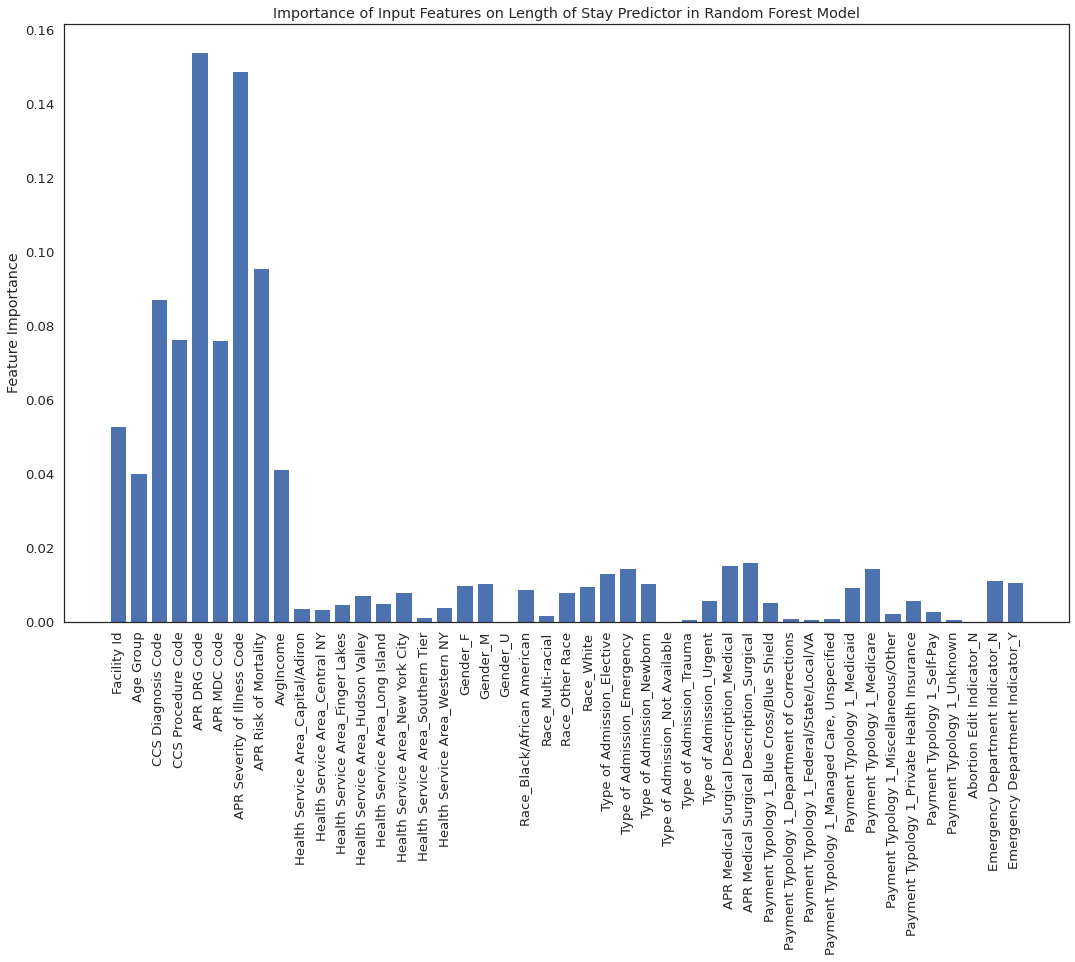

In [49]:
feat_importances = rf.feature_importances_
feat_names = X_train.columns.tolist()

plt.subplots(figsize=(18,11))
plt.xticks(rotation=90)
plt.bar(x=feat_names, height=feat_importances)
plt.title('Importance of Input Features on Length of Stay Predictor in Random Forest Model')
plt.ylabel('Feature Importance')
plt.show()


This provides yet another metric for feature importance, which allows for comparison bewteen the results found in the PCA section.

In [51]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state = 1, class_weight = "balanced", max_depth = 15)
boost = AdaBoostClassifier(dtree, n_estimators=75, random_state=0)
boost.fit(X_train, y_train)

train_predictions = boost.predict(X_train)
test_predictions = boost.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.8179553707898611
Test Accuracy: 0.6601064230994198


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.84      0.80      0.82    512864
          10       0.25      0.32      0.28    111085
          20       0.26      0.26      0.26     53169
          30       0.22      0.15      0.18     14629
          50       0.15      0.11      0.12      7039
         120       0.24      0.19      0.21      3881

    accuracy                           0.66    702667
   macro avg       0.33      0.30      0.31    702667
weighted avg       0.68      0.66      0.67    702667



To conclude the modeling section of the project, I briefly explore model performance and computational time in the Spark distributed environment. In this section, I save my dataframe to a csv, upload it to an S3 bucket, and read in into the AWS spark cluster environment.

In this section, I perform a random forest model on the dataset and find a similar model performance to the models found above. However, they did run a little faster which allowed for quicker tuning of hyperparameters.

# Spark Setup

In [0]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 10 newly installed, 0 to remove and 29 not upgraded.
Need to get 40.7 MB of archives.
After this operation, 153 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [1

In [0]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libcom-err2 libgssrpc4 libkadm5clnt-mit11
  libkadm5srv-mit11 libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
The following packages will be upgraded:
  libcom-err2
1 upgraded, 7 newly installed, 0 to remove and 28 not upgraded.
Need to get 358 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcom-err2 amd64 1.44.1-1ubuntu1.3 [8,848 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.1 [54.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.1 [37.2 kB]
Get:4 http

In [0]:
!apt update
!apt install gcc python-dev libkrb5-dev

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,814 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main amd64 Packages [875 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:1

In [0]:
#for local
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml-hospital').getOrCreate()

In [0]:
#for local
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [0]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


In [0]:
%%capture
!apt update
!apt install gcc python-dev libkrb5-dev
!pip install sparkmagic

In [0]:
%%capture
%load_ext sparkmagic.magics

In [0]:
#Connect to EMR cluster

%spark add -s my_session1 -l python -u http://ec2-54-226-81-138.compute-1.amazonaws.com:8998

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [0]:
#delete session if needed
%spark delete -s my_session1

In [0]:
#LOCAL VERSION
#Convert dataframe to spark sdf

#first read encoded_df to a csv for easier schema reading
encoded_df_2 = encoded_df.copy()
encoded_df_2.rename(columns = {'stay_label':'label'}, inplace = True) 
encoded_df_2.to_csv('all_data.csv')

#sqlContext=SQLContext(spark)

#all_data_sdf = sqlContext.read.csv("/content/all_data.csv", inferSchema=True, header=True)

In [0]:
#CLUSTER VERSION
#save dataframe to csv for use on cluster

encoded_df_2 = encoded_df.copy()
encoded_df_2.rename(columns = {'stay_label':'label'}, inplace = True) 
encoded_df_2.to_csv('all_data_larger_buckets.csv')

In [0]:
#read csv on cluster
%%spark

all_data_sdf = spark.read.csv("s3://hospital-dataset/cis545-finalproj/all_data_larger_buckets.csv", 
                                             inferSchema=True, header=True)

all_data_sdf.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+--------------+------------------+------------------+------------+------------+----------------------------+---------------------------------+-------------+-----------+------------------+----------------------------------+------------------------------+--------------------------------+---------------------------------+-------------------------------+---------------------------------+---------------------------------+------------------------------+-----------------+------------------+------------------+------------------+---------------------+--------+--------+--------+---------------------------+-----------------+---------------+----------+--------------------------+---------------------------+-------------------------+-------------------------------+------------------------+------------------------+-------------------------------------------+--------------------------------------------------------+-----------------------------------------+-----------------------------

In [0]:
%%spark

from pyspark.ml.feature import StringIndexer, VectorAssembler

all_columns = all_data_sdf.schema.names
drop_columns = ['_c0','Length of Stay','stay_bin','Total Charges', 'Total Costs','label'] #drop columns that we don't want to include in features
columns_to_use = [i for i in all_columns if i not in drop_columns]
assembler = VectorAssembler(inputCols=columns_to_use, outputCol='features')
label_indexer = StringIndexer(inputCol="label", outputCol="labelIndex")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Spark Random Forest

In [0]:
%%spark

#Now I will create a pipeline for the model
from pyspark.ml import Pipeline
from pyspark.ml.feature import PCA
stage_1 = assembler
stage_2 = label_indexer
#pca = PCA(k=51, inputCol='features', outputCol='pcaFeatures')
pipeline = Pipeline(stages = [stage_1, stage_2])
pipeline_model = pipeline.fit(all_data_sdf)
modified_data_sdf = pipeline_model.transform(all_data_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
%%spark
#Next, create train and test splits on the data
split_sdf = modified_data_sdf.randomSplit([0.7, 0.3])
train_sdf = split_sdf[0]
test_sdf = split_sdf[1]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
%%spark
#Initiate random forest model
from pyspark.ml.classification import RandomForestClassifier
rf_model = RandomForestClassifier(featuresCol='features', labelCol='labelIndex', numTrees=100, maxDepth=10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
%%spark
rf_train = rf_model.fit(train_sdf)
train_predictions = rf_train.transform(train_sdf)
test_predictions = rf_train.transform(test_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
%%spark
#results with 100 trees and max depth of 10
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")
train_acc_rf = evaluator.evaluate(train_predictions)
test_acc_rf = evaluator.evaluate(test_predictions)
print('Random forest train accuracy:', train_acc_rf)
print('Random forest test_accuracy:', test_acc_rf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Random forest train accuracy: 0.5150016215325067
Random forest test_accuracy: 0.513880430657254

Unfortunately, spark does not have the class_weights parameter that is present in scikit learn. Let's deal with class balancing by manually assigning class weights using the inverse ratio of the frequency they appear in spark

In [0]:
#first lets count how many times each label appears and then calculate the frequency of the label
%%spark
import pyspark.sql.functions as fn
count_sdf = modified_data_sdf.select('label').groupBy('label').count()
freq_sdf = count_sdf.withColumn('frequency', fn.col('count')/2342221) #number of rows in dataframe
inverse_freq_sdf = freq_sdf.withColumn('inverse_freq', 1 - fn.col('frequency'))
inverse_freq_sdf.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+--------------------+-------------------+
|label|  count|           frequency|       inverse_freq|
+-----+-------+--------------------+-------------------+
|   13| 123552| 0.05274993264939559| 0.9472500673506044|
|    6| 525121| 0.22419788738978944| 0.7758021126102106|
|    3|1303607|  0.5565687439400466|0.44343125605995337|
|   20|  93345| 0.03985319916438287| 0.9601468008356171|
|  120|  12738|0.005438427885327...| 0.9945615721146723|
|    9| 212106| 0.09055763738776144| 0.9094423626122385|
|   50|  71752|0.030634171583296368| 0.9693658284167036|
+-----+-------+--------------------+-------------------+

In [0]:
#now lets join this dataframe back onto our all_data_sdf and incorporate it as a feature in our vector assembler
%%spark
all_data_sdf = all_data_sdf.alias("all_data_sdf")
inverse_freq_sdf = inverse_freq_sdf.alias("inverse_freq_sdf")
weighted_all_data_sdf = all_data_sdf.join(inverse_freq_sdf.select('label', 'inverse_freq'), 
                                          fn.col("all_data_sdf.label") == fn.col("inverse_freq_sdf.label")
                                          ,'inner').select([fn.col('all_data_sdf.'+xx) for xx in all_data_sdf.columns] + 
                                                           [fn.col('inverse_freq_sdf.inverse_freq')])

weighted_all_data_sdf.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------+--------------+------------------+------------------+------------+------------+----------------------------+---------------------------------+-------------+-----------+------------------+----------------------------------+------------------------------+--------------------------------+---------------------------------+-------------------------------+---------------------------------+---------------------------------+------------------------------+-----------------+------------------+------------------+------------------+---------------------+--------+--------+--------+---------------------------+-----------------+---------------+----------+--------------------------+---------------------------+-------------------------+-------------------------------+------------------------+------------------------+-------------------------------------------+--------------------------------------------------------+-----------------------------------------+-------------------------

In [0]:
#apply previous pipeline
%%spark
pipeline_model = pipeline.fit(weighted_all_data_sdf)
modified_data_sdf = pipeline_model.transform(weighted_all_data_sdf)

split_sdf = modified_data_sdf.randomSplit([0.7, 0.3])
train_sdf = split_sdf[0]
test_sdf = split_sdf[1]

rf_train = rf_model.fit(train_sdf)
train_predictions = rf_train.transform(train_sdf)
test_predictions = rf_train.transform(test_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
%%spark
#results with 100 trees and max depth of 10 and class balancing
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")
train_acc_rf = evaluator.evaluate(train_predictions)
test_acc_rf = evaluator.evaluate(test_predictions)
print('Random forest train accuracy:', train_acc_rf)
print('Random forest test_accuracy:', test_acc_rf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Random forest train accuracy: 0.5144905674501358
Random forest test_accuracy: 0.5109449030360579

# Challenges/Obstacles Faced

In [0]:
#Some summary stats on final model performances

dtree_train = 0.527951503884593
dtree_test = 0.5266235642203205
rf_train = 0.5886051938514987
rf_test = 0.5488218459099403
log_reg_train = 0.49271703381544885
log_reg_test = 0.49294198300269465
svm_train = 0.47783421589041897
svm_test =  0.4776046121420246

Over the course of this project, there were a couple of challenges I had to overcome. One of the largest challenges in this project was the large class imbalance present in the data. To add to this issue, my project called for a multi-class prediction model, which originally has 120 different classes (ranging from 1 day length of stay to "120 or more"). This coupling of factors caused inaccurate prediction metrics (due to overprediction for the most common length of stay days) and poor model accuracy (due to the large number of classes). Although regression was also tried as a workaround for having to characterize length of stay as a class with 120 different class instances, it was found to perform worse than the classification models. In order to deal with these two major issues in the raw dataset (class imbalances coupled with a large number of classes), I looked into and tried various class balancing and class number reduction strategies, analyzing how each one affected model accuracy. Finding the optimal way of dealing with this was definitely a challenge that required iteration and testing, resulting in this part of the project consuming the most time in order to achieve the highest model accuracy possible.


Another challenge I faced in this dataset was the presence of categorical variables with, at times, hundreds of different associated categories in each. The presence of these features meant that simply one-hot encoding the dataframe would result in hundres of columns encoding binary forms of each category label. This even meant crashing the RAM a few times. As a result, I had to find different methods of encoding this data, such as choosing columns which represented categorical features with numbers, webscraping to replace zipcode with average income, which all served to prevent the need to one-hot encode categorical features with hundreds of associated categories.

# Future Directions

Future work should look to improve upon model accuracy by performing more exhaustive hyperparameter searches for models such as the random forest, which have proven to be effective here. In addition, more features could be obtained about the patients in order to create a model with potentially more predictive power. In addition, various feature encoding methods could also be looked at in more detail, since there are a variety of numerical columns that represent categories (numbers do not have meaning). Methods such as frequency encoding and others could be looked into here. Furthermore, alternatives to PCA could be used, such as multiple correspondence analysis, or MCA. This is the categorical feature analog to PCA, which is primarily meant for continuous variables. 

Next, a second model could be created to perform a sequence of model predictions that would ultimately allow a hospital to predict how much each patient will cost to treat over the course of their stay. This could be accomplished through first predicting length of stay through models such as the one created here. Next, a second model could be created to predict "Total Charges" from length of stay, which has the benefit of length of stay and total charges being linearly correlated, as shown by one of the figures in the exploratory data analysis and visualization section of this project
